# 필요 라이브러리 Import

In [186]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import statsmodels.api as sm
import warnings
import shap

from sklearn.model_selection import StratifiedKFold
from pycaret.regression import *
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import ExtraTreeRegressor
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from pycaret.regression import *

In [2]:
#2
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

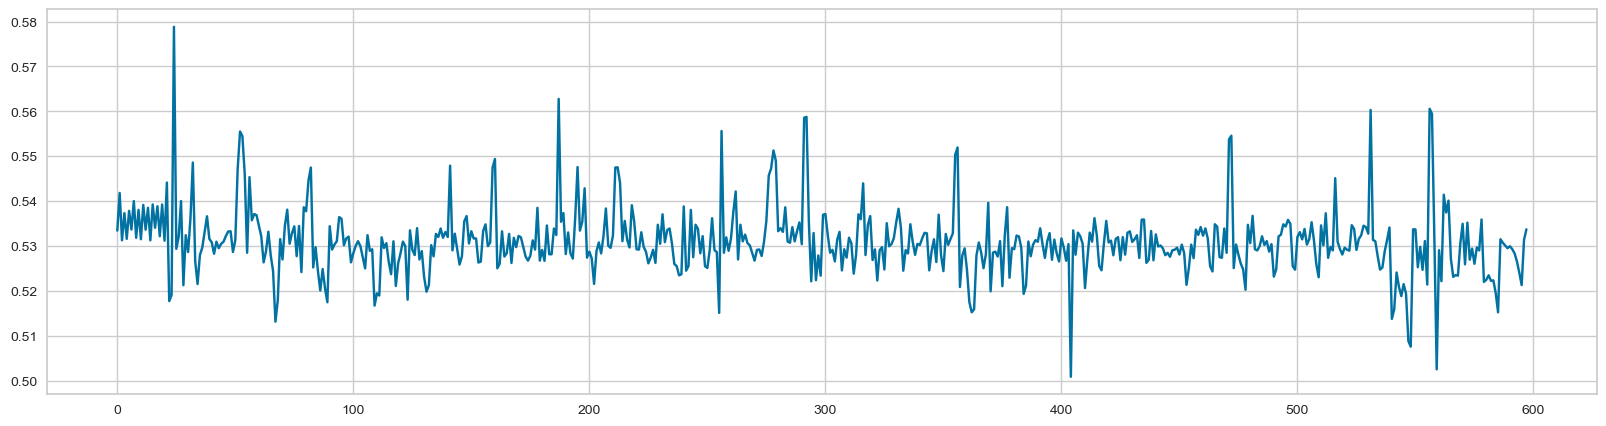

In [5]:
plt.figure(figsize=(20,5))
plt.plot(range(len(train_data)), train_data["Y_Quality"])
plt.show()

In [3]:
A_31 = train_data[train_data['PRODUCT_CODE'] == 'A_31']
T_31 = train_data[train_data['PRODUCT_CODE'] == 'T_31']
O_31 = train_data[train_data['PRODUCT_CODE'] == 'O_31']

NameError: name 'train_data' is not defined

In [27]:
T050304 = train_data[train_data['LINE'] == 'T050304']
T050307 = train_data[train_data['LINE'] == 'T050307']
T010305 = train_data[train_data['LINE'] == 'T010305']
T010306 = train_data[train_data['LINE'] == 'T010306']
T100304 = train_data[train_data['LINE'] == 'T100304']
T100306 = train_data[train_data['LINE'] == 'T100306']

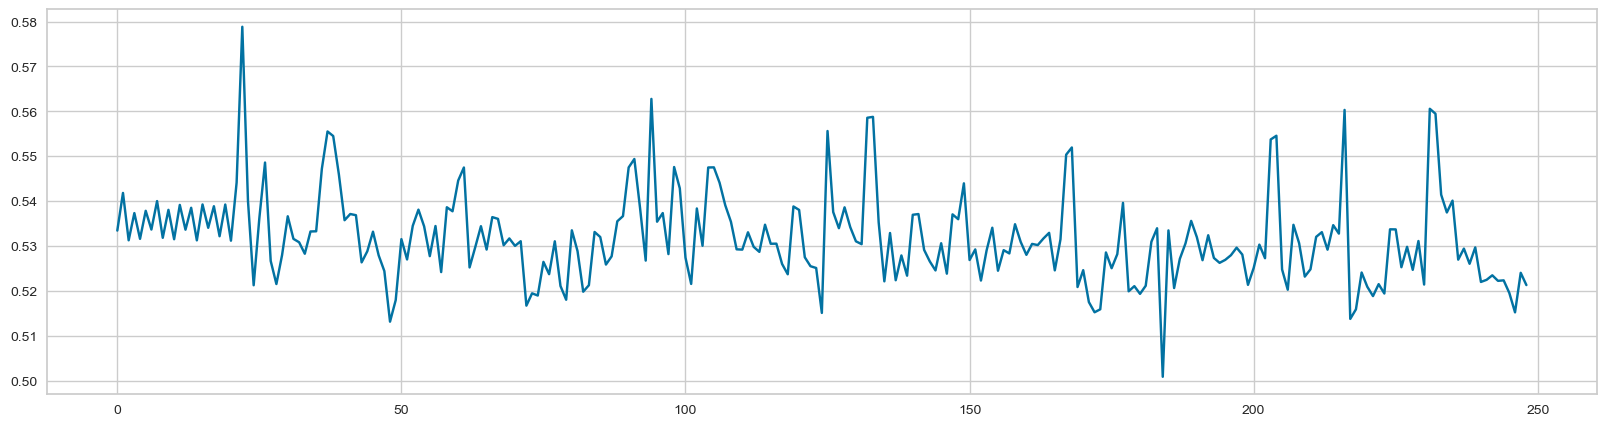

In [13]:
plt.figure(figsize=(20,5))
plt.plot(range(len(A_31)), A_31["Y_Quality"])
plt.show()

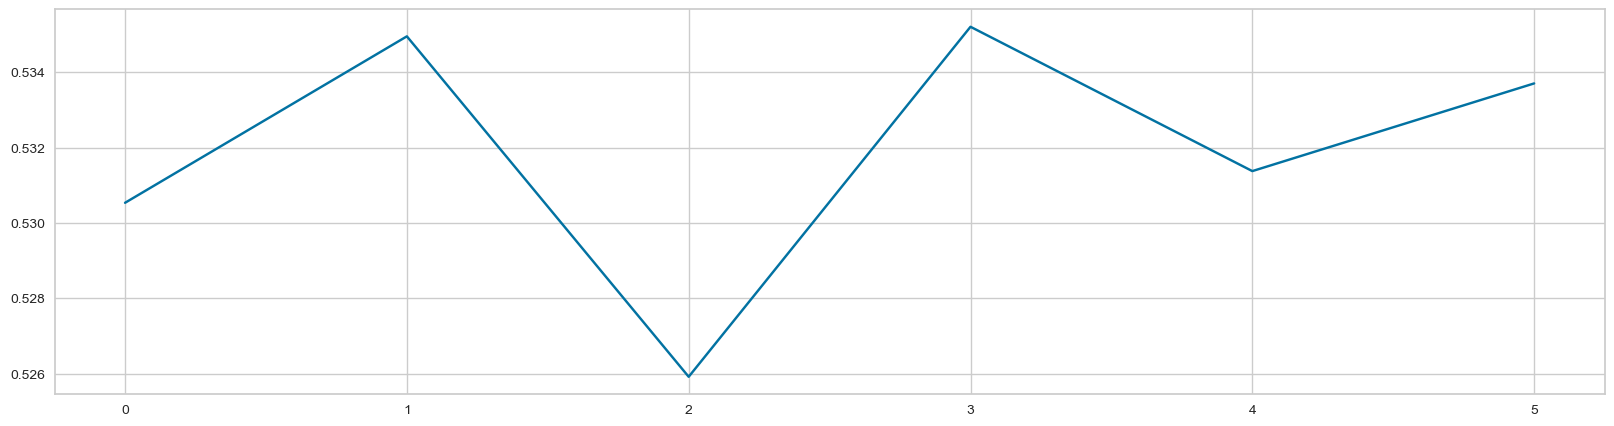

In [15]:
plt.figure(figsize=(20,5))
plt.plot(range(len(O_31)), O_31["Y_Quality"])
plt.show()

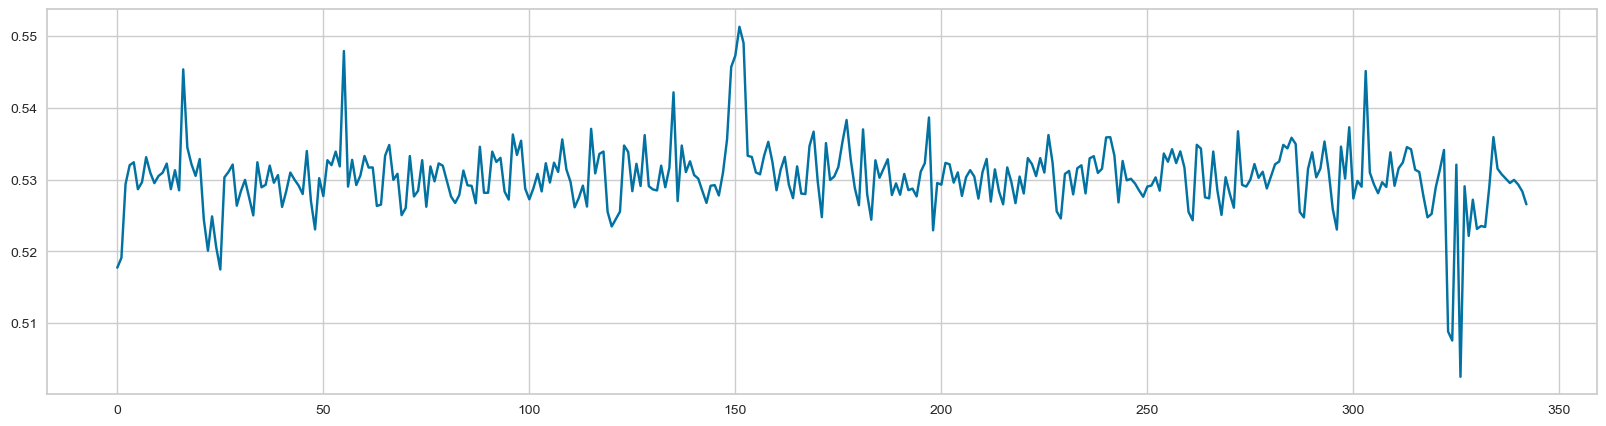

In [16]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T_31)), T_31["Y_Quality"])
plt.show()

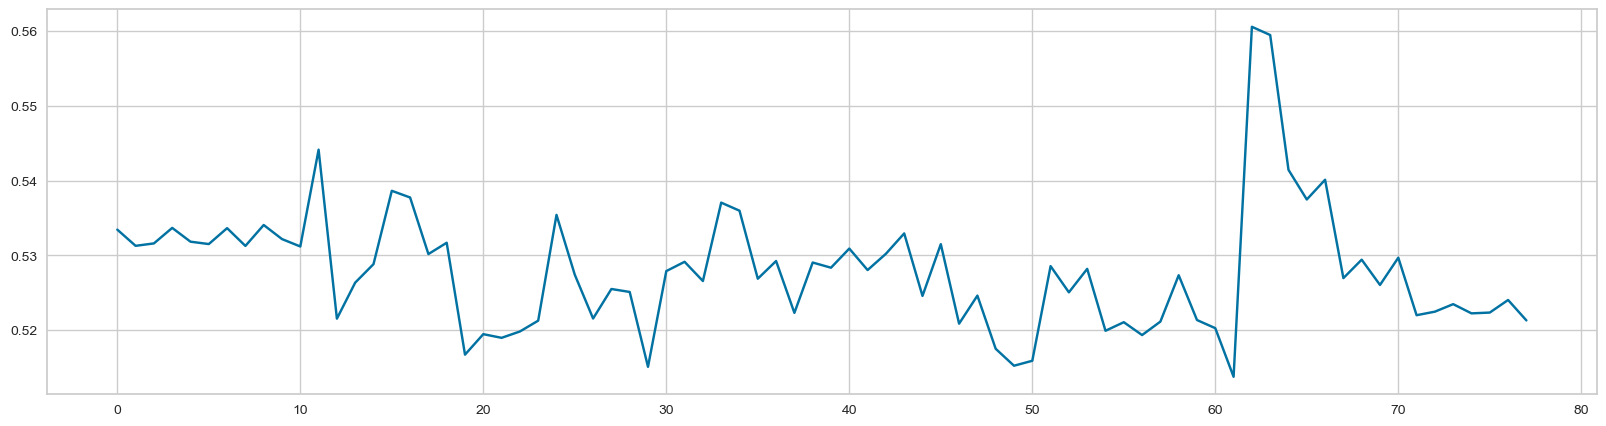

In [17]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T050304)), T050304["Y_Quality"])
plt.show()

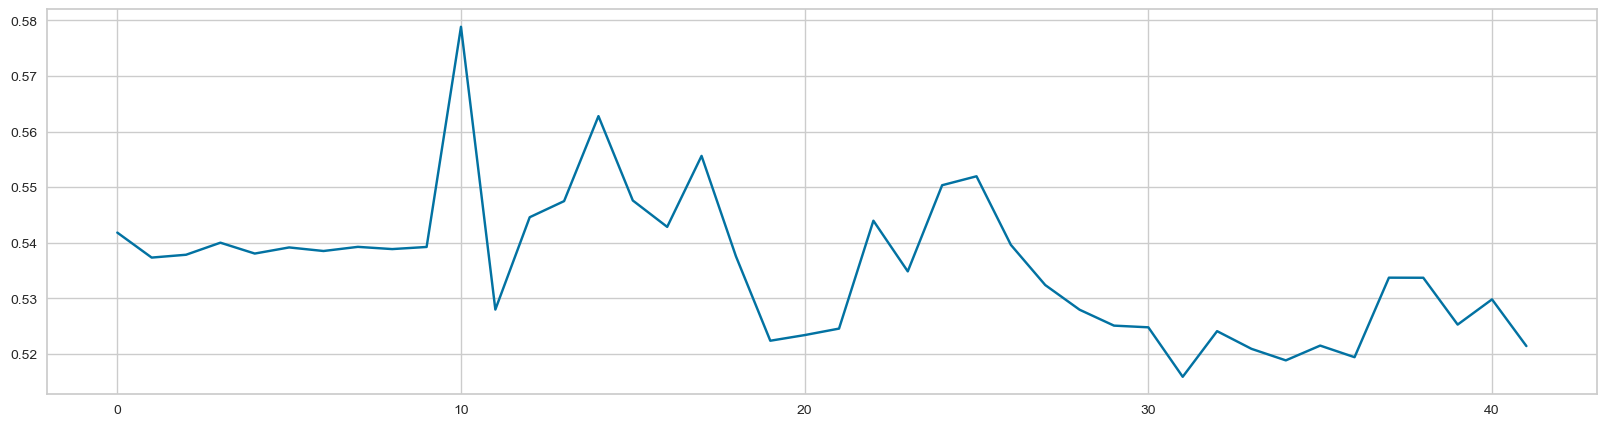

In [18]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T050307)), T050307["Y_Quality"])
plt.show()

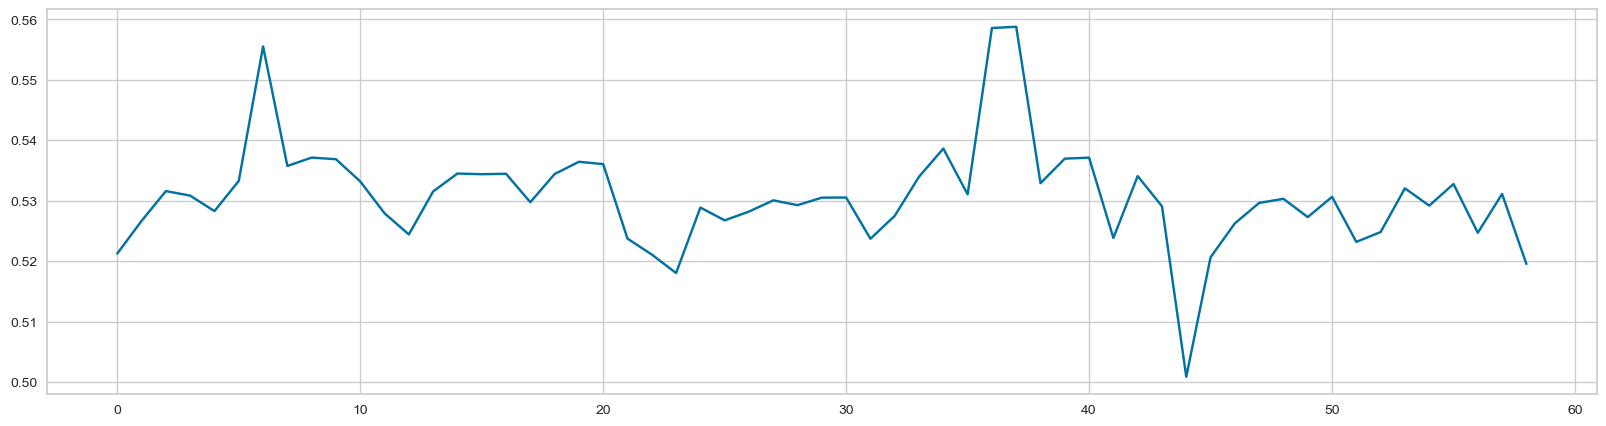

In [19]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T010305)), T010305["Y_Quality"])
plt.show()

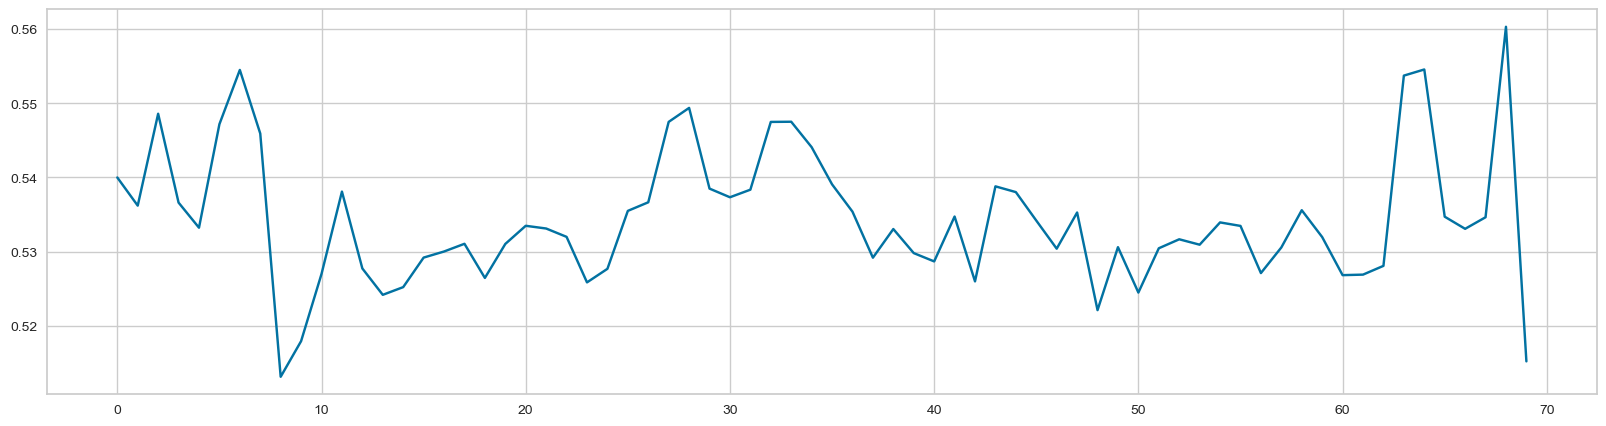

In [20]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T010306)), T010306["Y_Quality"])
plt.show()

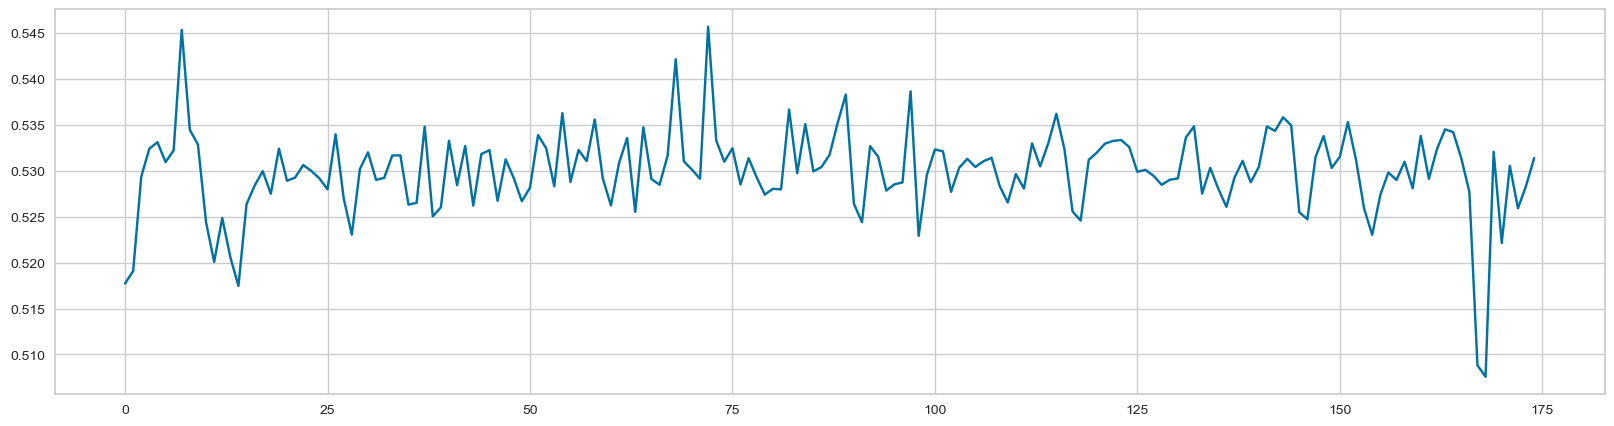

In [21]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T100304)), T100304["Y_Quality"])
plt.show()

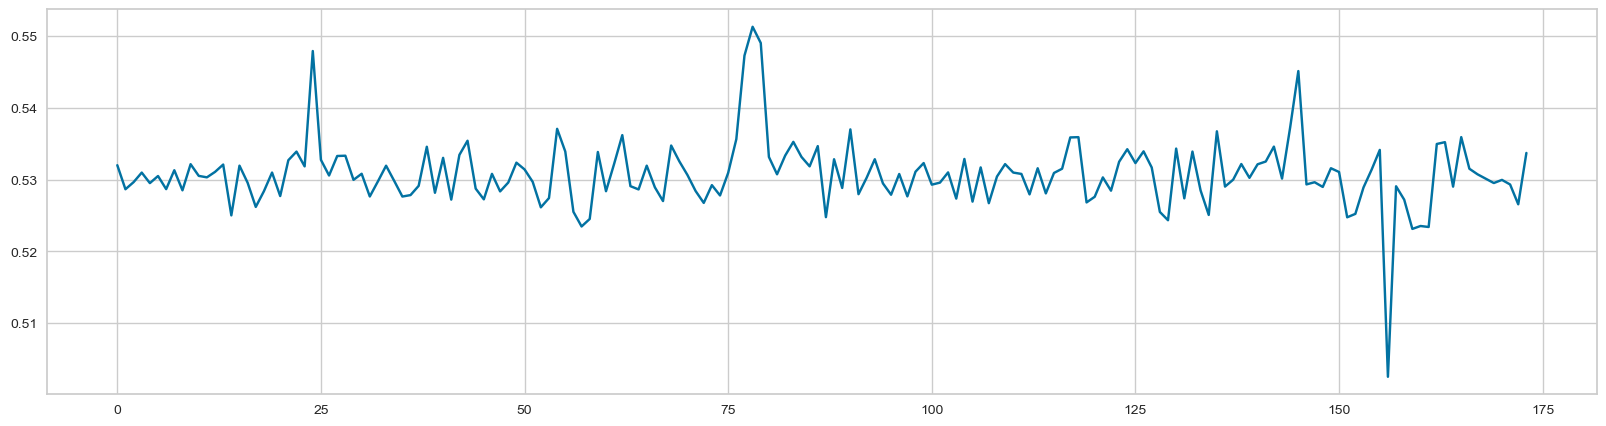

In [22]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T100306)), T100306["Y_Quality"])
plt.show()

In [32]:
T050304 = train_data[train_data['LINE'] == 'T050304']
T050307 = train_data[train_data['LINE'] == 'T050307']
T010305 = train_data[train_data['LINE'] == 'T010305']
T010306 = train_data[train_data['LINE'] == 'T010306']
T100304 = train_data[train_data['LINE'] == 'T100304']
T100306 = train_data[train_data['LINE'] == 'T100306']
A_31 = train_data[train_data['PRODUCT_CODE'] == 'A_31']
T_31 = train_data[train_data['PRODUCT_CODE'] == 'T_31']
O_31 = train_data[train_data['PRODUCT_CODE'] == 'O_31']

In [283]:
T05 = train_data[(train_data['LINE'] == 'T050304')|(train_data['LINE'] == 'T050307')]
T01 = train_data[(train_data['LINE'] == 'T010305')|(train_data['LINE'] == 'T010306')]
T10 = train_data[(train_data['LINE'] == 'T100304')|(train_data['LINE'] == 'T100306')]

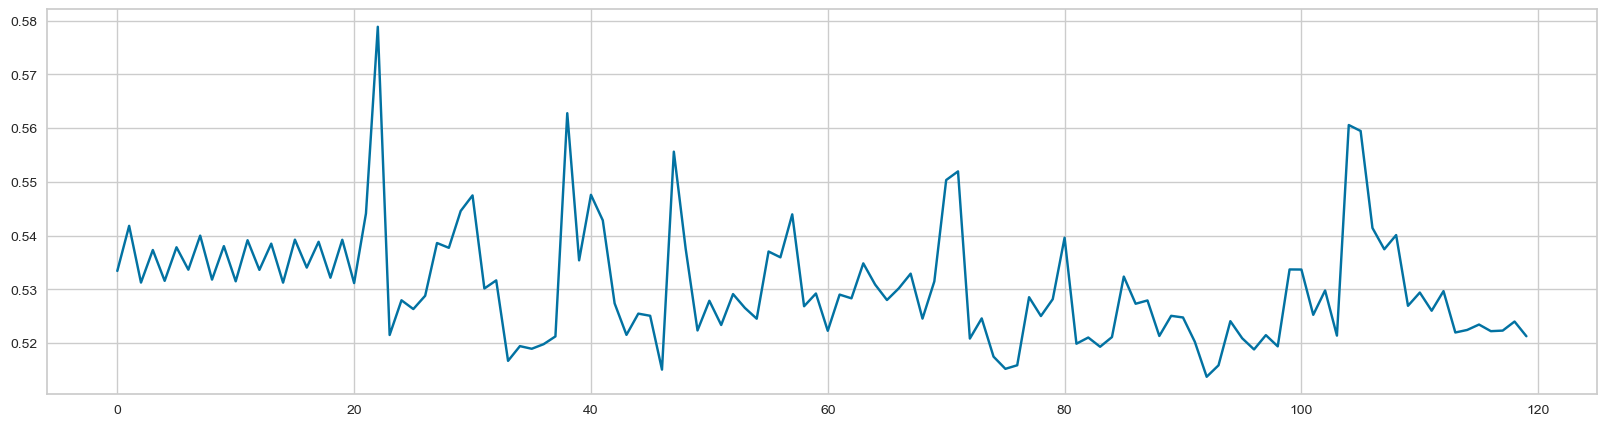

In [35]:
plt.figure(figsize=(20,5))
plt.plot(range(len(T05)), T05["Y_Quality"])
plt.show()

# Data

In [28]:
#3
train_data = pd.read_csv("./train.csv")
train_data

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
0    TRAIN_000        1   0.533433   2022-06-13 5:14  T050304         A_31   
1    TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
2    TRAIN_002        1   0.531267   2022-06-13 5:30  T050304         A_31   
3    TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
4    TRAIN_004        1   0.531590   2022-06-13 5:47  T050304         A_31   
..         ...      ...        ...               ...      ...          ...   
593  TRAIN_593        1   0.526546  2022-09-08 14:30  T100306         T_31   
594  TRAIN_594        0   0.524022  2022-09-08 22:38  T050304         A_31   
595  TRAIN_595        0   0.521289  2022-09-08 22:47  T050304         A_31   
596  TRAIN_596        1   0.531375  2022-09-08 14:38  T100304         O_31   
597  TRAIN_597        1   0.533702  2022-09-08 14:46  T100306         O_31   

      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10   X_11   X_12  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...    ...    ...   
593   2.0  95.0  0.0  45.0  10.0  0.0  50.0  10.0  52.0   2.0  468.9  473.9   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
596  40.0  94.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  505.8  510.9   
597  21.0  87.0  0.0  45.0  10.0  0.0  61.0  10.0  52.0   2.0  470.6  474.9   

      X_13  X_14  X_15   X_16   X_17   X_18   X_19   X_20   X_21   X_22  X_23  \
0      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
3      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
4      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...   
593  459.2   0.0   0.0  247.5  248.0  247.3  250.0  527.0  538.0  522.0  0.19   
594    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
595    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
596  497.1   0.0   0.0  247.5  248.1  247.3  250.0  489.0  498.0  485.0  0.19   
597  462.9   0.0   0.0  247.5  248.0  247.3  250.0  525.0  534.0  520.0  0.19   

     X_24  X_25   X_26   X_27   X_28   X_29   X_30   X_31   X_32   X_33  \
0     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
593  0.19  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   
594   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
595   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
596  0.19  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   
597  0.20  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   

      X_34   X_35   X_36   X_37   X_38  X_39  X_40  X_41  X_42  X_43  X_44  \
0      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2      NaN

In [29]:
#4
train_data['YEAR'] =  pd.to_datetime(train_data['TIMESTAMP']).dt.year
train_data['MONTH'] =  pd.to_datetime(train_data['TIMESTAMP']).dt.month
train_data['DAY'] =  pd.to_datetime(train_data['TIMESTAMP']).dt.day
train_data['HOUR'] =  pd.to_datetime(train_data['TIMESTAMP']).dt.hour
train_data['MINUTE'] =  pd.to_datetime(train_data['TIMESTAMP']).dt.minute
train_data['DAY_OF_WEEK'] =  pd.to_datetime(train_data['TIMESTAMP']).dt.day_name()

In [30]:
#5
colls = []
for coll in train_data :
    if 'X' in coll and train_data[coll].isna().sum() == 598 :
        colls.append(coll)
print(len(colls))

82


In [31]:
#6
train_data.drop(colls, inplace = True, axis = 1)

In [284]:
T05 = T05.fillna(T05.mean(axis = 1))
T01 = T01.fillna(T01.mean(axis = 1))
T10 = T10.fillna(T10.mean(axis = 1))
train_data = pd.concat([T05, T01, T10])

In [32]:
#7
le = LabelEncoder()

le.fit(train_data['DAY_OF_WEEK'])
train_data['DAY_OF_WEEK'] = le.transform(train_data['DAY_OF_WEEK'])

le.fit(train_data['LINE'])
train_data['LINE'] = le.transform(train_data['LINE'])

le.fit(train_data['PRODUCT_CODE'])
train_data['PRODUCT_CODE'] = le.transform(train_data['PRODUCT_CODE'])


train_data.drop(['PRODUCT_ID', 'TIMESTAMP'], axis = 1, inplace = True)
train_data

Y_Class  Y_Quality  LINE  PRODUCT_CODE   X_1   X_2  X_3   X_4   X_5  X_6  \
0          1   0.533433     2             0   NaN   NaN  NaN   NaN   NaN  NaN   
1          2   0.541819     3             0   NaN   NaN  NaN   NaN   NaN  NaN   
2          1   0.531267     2             0   NaN   NaN  NaN   NaN   NaN  NaN   
3          2   0.537325     3             0   NaN   NaN  NaN   NaN   NaN  NaN   
4          1   0.531590     2             0   NaN   NaN  NaN   NaN   NaN  NaN   
..       ...        ...   ...           ...   ...   ...  ...   ...   ...  ...   
593        1   0.526546     5             2   2.0  95.0  0.0  45.0  10.0  0.0   
594        0   0.524022     2             0   NaN   NaN  NaN   NaN   NaN  NaN   
595        0   0.521289     2             0   NaN   NaN  NaN   NaN   NaN  NaN   
596        1   0.531375     4             1  40.0  94.0  0.0  45.0  11.0  0.0   
597        1   0.533702     5             1  21.0  87.0  0.0  45.0  10.0  0.0   

      X_7   X_8   X_9  X_10   X_11   X_12   X_13  X_14  X_15   X_16   X_17  \
0     NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
1     NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
2     NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
3     NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
4     NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
..    ...   ...   ...   ...    ...    ...    ...   ...   ...    ...    ...   
593  50.0  10.0  52.0   2.0  468.9  473.9  459.2   0.0   0.0  247.5  248.0   
594   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
595   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
596  45.0  10.0  31.0   2.0  505.8  510.9  497.1   0.0   0.0  247.5  248.1   
597  61.0  10.0  52.0   2.0  470.6  474.9  462.9   0.0   0.0  247.5  248.0   

      X_18   X_19   X_20   X_21   X_22  X_23  X_24  X_25   X_26   X_27   X_28  \
0      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
1      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
2      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
3      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
4      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
..     ...    ...    ...    ...    ...   ...   ...   ...    ...    ...    ...   
593  247.3  250.0  527.0  538.0  522.0  0.19  0.19  0.19  155.0  155.0  155.0   
594    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
595    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
596  247.3  250.0  489.0  498.0  485.0  0.19  0.19  0.19  155.0  155.0  155.0   
597  247.3  250.0  525.0  534.0  520.0  0.19  0.20  0.19  155.0  155.0  155.0   

      X_29   X_30   X_31   X_32   X_33   X_34   X_35   X_36   X_37   X_38  \
0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
593  155.0  185.0  185.0  185.0  185.0  155.0  155.0  155.0  155.0  0.075   
594    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
595    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
596  155.0  185.0  185.0  185.0  185.0  155.0  155.0  155.0  155.0  0.078   
597  155.0  185.0  185.0  185.0  185.0  155.0  155.0  155.0  155.0  0.077   

     X_39  X_40  X_41  X_42  X_43  X_44  X_45  X_46  X_47  X_48  X_49  X_50  \
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     NaN   NaN   NaN   NaN   NaN   NaN

In [33]:
#8
cols = train_data.columns
cols

Index(['Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3',
       'X_4', 'X_5', 'X_6',
       ...
       'X_2868', 'X_2869', 'X_2870', 'X_2871', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'DAY_OF_WEEK'],
      dtype='object', length=2803)

In [25]:
#9 
imputer = IterativeImputer(estimator=RandomForestRegressor(verbose=0, random_state=0), 
max_iter=10, verbose=0, imputation_order='ascending', random_state=0)

train_data = imputer.fit_transform(train_data)
x_datas = train_data

In [36]:
x_datas = x_data

In [35]:
#9.5
train_data = x_data
train_data = pd.DataFrame(train_data, columns = cols)
train_data

Y_Class  Y_Quality  LINE  PRODUCT_CODE    X_1    X_2  X_3   X_4    X_5  \
0        1.0   0.533433   2.0           0.0   2.64  95.99  0.0  45.0  10.05   
1        2.0   0.541819   3.0           0.0   2.64  96.08  0.0  45.0  10.04   
2        1.0   0.531267   2.0           0.0   2.64  96.08  0.0  45.0  10.05   
3        2.0   0.537325   3.0           0.0   2.64  95.98  0.0  45.0  10.04   
4        1.0   0.531590   2.0           0.0   2.64  95.90  0.0  45.0  10.05   
..       ...        ...   ...           ...    ...    ...  ...   ...    ...   
593      1.0   0.526546   5.0           2.0   2.00  95.00  0.0  45.0  10.00   
594      0.0   0.524022   2.0           0.0   2.64  95.99  0.0  45.0  10.05   
595      0.0   0.521289   2.0           0.0   2.64  95.95  0.0  45.0  10.05   
596      1.0   0.531375   4.0           1.0  40.00  94.00  0.0  45.0  11.00   
597      1.0   0.533702   5.0           1.0  21.00  87.00  0.0  45.0  10.00   

     X_6    X_7   X_8    X_9  X_10     X_11     X_12     X_13  X_14  X_15  \
0    0.0  47.37  10.0  38.14   2.0  496.766  503.491  488.184   0.0   0.0   
1    0.0  47.39  10.0  38.14   2.0  496.797  503.476  488.184   0.0   0.0   
2    0.0  47.37  10.0  38.14   2.0  496.807  503.491  488.194   0.0   0.0   
3    0.0  47.39  10.0  38.14   2.0  496.807  503.491  488.194   0.0   0.0   
4    0.0  47.37  10.0  38.14   2.0  496.807  503.496  488.199   0.0   0.0   
..   ...    ...   ...    ...   ...      ...      ...      ...   ...   ...   
593  0.0  50.00  10.0  52.00   2.0  468.900  473.900  459.200   0.0   0.0   
594  0.0  47.45  10.0  38.14   2.0  496.878  503.484  488.219   0.0   0.0   
595  0.0  47.45  10.0  38.14   2.0  496.878  503.489  488.219   0.0   0.0   
596  0.0  45.00  10.0  31.00   2.0  505.800  510.900  497.100   0.0   0.0   
597  0.0  61.00  10.0  52.00   2.0  470.600  474.900  462.900   0.0   0.0   

        X_16     X_17     X_18   X_19    X_20    X_21    X_22  X_23  X_24  \
0    247.543  248.069  247.290  250.0  497.75  507.26  491.37  0.19  0.19   
1    247.546  248.070  247.288  250.0  497.75  507.26  491.37  0.19  0.19   
2    247.542  248.067  247.289  250.0  497.75  507.26  491.36  0.19  0.19   
3    247.543  248.069  247.287  250.0  497.75  507.25  491.36  0.19  0.19   
4    247.541  248.068  247.291  250.0  497.75  507.25  491.36  0.19  0.19   
..       ...      ...      ...    ...     ...     ...     ...   ...   ...   
593  247.500  248.000  247.300  250.0  527.00  538.00  522.00  0.19  0.19   
594  247.539  248.067  247.287  250.0  497.75  506.38  491.38  0.19  0.19   
595  247.538  248.066  247.289  250.0  497.75  506.38  491.38  0.19  0.19   
596  247.500  248.100  247.300  250.0  489.00  498.00  485.00  0.19  0.19   
597  247.500  248.000  247.300  250.0  525.00  534.00  520.00  0.19  0.20   

     X_25   X_26   X_27   X_28   X_29   X_30   X_31   X_32   X_33   X_34  \
0    0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
1    0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
2    0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
3    0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
4    0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
593  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
594  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
595  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
596  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   
597  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0  155.0   

      X_35   X_36   X_37     X_38  X_39    X_40    X_41    X_42    X_43  \
0    155.0  155.0  155.0  0.07795  1.09  63.924  65.218  65.578  76.898   
1    155.0  155.0  155.0  0.07795  1.09  63.924  65.221  65.578  76.898   
2    155.0  155.0  155.0  0.07796  1.09  63.924  65.218  65.578  76.

In [285]:
train_data = train_data.fillna(train_data.mean())
train_data.fillna(0, inplace = True)

In [8]:

le = LabelEncoder()

le.fit(train_data['DAY_OF_WEEK'])
train_data['DAY_OF_WEEK'] = le.transform(train_data['DAY_OF_WEEK'])

train_data

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
0    TRAIN_000        1   0.533433   2022-06-13 5:14  T050304         A_31   
1    TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
2    TRAIN_002        1   0.531267   2022-06-13 5:30  T050304         A_31   
3    TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
4    TRAIN_004        1   0.531590   2022-06-13 5:47  T050304         A_31   
..         ...      ...        ...               ...      ...          ...   
593  TRAIN_593        1   0.526546  2022-09-08 14:30  T100306         T_31   
594  TRAIN_594        0   0.524022  2022-09-08 22:38  T050304         A_31   
595  TRAIN_595        0   0.521289  2022-09-08 22:47  T050304         A_31   
596  TRAIN_596        1   0.531375  2022-09-08 14:38  T100304         O_31   
597  TRAIN_597        1   0.533702  2022-09-08 14:46  T100306         O_31   

      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10   X_11   X_12  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...    ...    ...   
593   2.0  95.0  0.0  45.0  10.0  0.0  50.0  10.0  52.0   2.0  468.9  473.9   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
596  40.0  94.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  505.8  510.9   
597  21.0  87.0  0.0  45.0  10.0  0.0  61.0  10.0  52.0   2.0  470.6  474.9   

      X_13  X_14  X_15   X_16   X_17   X_18   X_19   X_20   X_21   X_22  X_23  \
0      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
3      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
4      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...   
593  459.2   0.0   0.0  247.5  248.0  247.3  250.0  527.0  538.0  522.0  0.19   
594    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
595    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
596  497.1   0.0   0.0  247.5  248.1  247.3  250.0  489.0  498.0  485.0  0.19   
597  462.9   0.0   0.0  247.5  248.0  247.3  250.0  525.0  534.0  520.0  0.19   

     X_24  X_25   X_26   X_27   X_28   X_29   X_30   X_31   X_32   X_33  \
0     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
593  0.19  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   
594   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
595   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
596  0.19  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   
597  0.20  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   

      X_34   X_35   X_36   X_37   X_38  X_39  X_40  X_41  X_42  X_43  X_44  \
0      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2      NaN

In [9]:

le = LabelEncoder()

le.fit(train_data['LINE'])
train_data['LINE'] = le.transform(train_data['LINE'])

le.fit(train_data['PRODUCT_CODE'])
train_data['PRODUCT_CODE'] = le.transform(train_data['PRODUCT_CODE'])

train_data

PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP  LINE  PRODUCT_CODE  \
0    TRAIN_000        1   0.533433   2022-06-13 5:14     2             0   
1    TRAIN_001        2   0.541819   2022-06-13 5:22     3             0   
2    TRAIN_002        1   0.531267   2022-06-13 5:30     2             0   
3    TRAIN_003        2   0.537325   2022-06-13 5:39     3             0   
4    TRAIN_004        1   0.531590   2022-06-13 5:47     2             0   
..         ...      ...        ...               ...   ...           ...   
593  TRAIN_593        1   0.526546  2022-09-08 14:30     5             2   
594  TRAIN_594        0   0.524022  2022-09-08 22:38     2             0   
595  TRAIN_595        0   0.521289  2022-09-08 22:47     2             0   
596  TRAIN_596        1   0.531375  2022-09-08 14:38     4             1   
597  TRAIN_597        1   0.533702  2022-09-08 14:46     5             1   

      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10   X_11   X_12  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...    ...    ...   
593   2.0  95.0  0.0  45.0  10.0  0.0  50.0  10.0  52.0   2.0  468.9  473.9   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN    NaN    NaN   
596  40.0  94.0  0.0  45.0  11.0  0.0  45.0  10.0  31.0   2.0  505.8  510.9   
597  21.0  87.0  0.0  45.0  10.0  0.0  61.0  10.0  52.0   2.0  470.6  474.9   

      X_13  X_14  X_15   X_16   X_17   X_18   X_19   X_20   X_21   X_22  X_23  \
0      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
3      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
4      NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...   
593  459.2   0.0   0.0  247.5  248.0  247.3  250.0  527.0  538.0  522.0  0.19   
594    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
595    NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
596  497.1   0.0   0.0  247.5  248.1  247.3  250.0  489.0  498.0  485.0  0.19   
597  462.9   0.0   0.0  247.5  248.0  247.3  250.0  525.0  534.0  520.0  0.19   

     X_24  X_25   X_26   X_27   X_28   X_29   X_30   X_31   X_32   X_33  \
0     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4     NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
593  0.19  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   
594   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
595   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
596  0.19  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   
597  0.20  0.19  155.0  155.0  155.0  155.0  185.0  185.0  185.0  185.0   

      X_34   X_35   X_36   X_37   X_38  X_39  X_40  X_41  X_42  X_43  X_44  \
0      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1      NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2      NaN    NaN    NaN    NaN   

In [126]:
#10
yy_target = train_data['Y_Class']

In [125]:
#11
y_target = train_data['Y_Quality']
x_data = train_data.drop(['Y_Class', 'Y_Quality'], axis = 1)
x_data = x_data.drop(['MONTH', 'MINUTE', 'DAY', 'YEAR'], axis = 1)

# Model

In [40]:
#12
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.1, random_state = 4)

In [127]:
#13
setup_rgs = setup(data = x_data, target=y_target, session_id = 414)
top5 = compare_models(sort='MSE', n_select=5)

Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [128]:
top5

[ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize='deprecated', positive=False,
            precompute=False, random_state=414, selection='cyclic', tol=0.0001,
            warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=414, verbose=0,
                       warm_start=False),
 OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                           normalize='deprecated', precompute='auto', tol=None),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                       max_feature

In [301]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [129]:
#14
total_models = []
model_lightgbm = create_model('lightgbm', fold = 5)
total_models.append(model_lightgbm)


#gbr = GradientBoostingRegressor()
#rf = RandomForestRegressor()
#lgbm = lgb.LGBMRegressor()
#cat = CatBoostRegressor()
#xgb = XGBRegressor()
#gbr = ExtraTreeRegressor()

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [130]:
#15
model_gbr = create_model('gbr', fold = 5)
total_models.append(model_gbr)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [131]:
#16
model_et = create_model('et', fold = 5)
total_models.append(model_et)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [132]:

#17
model_catboost = create_model('catboost', fold = 5)
total_models.append(model_catboost)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [133]:
#18
model_xgb = create_model('xgboost', fold = 5)
total_models.append(model_xgb)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [134]:
#19
model_ada = create_model('ada', fold = 5)
total_models.append(model_ada)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [135]:
total_models

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=414, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='squared_error',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=414, subsample=1.0, tol=0.0001,
           

In [136]:
#20
model_lightgbm = tune_model(model_lightgbm, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [137]:
#21
model_gbr = tune_model(model_gbr, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [138]:
#22
model_et = tune_model(model_et, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [139]:
#23
model_catboost = tune_model(model_catboost, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [140]:
#24
model_xgb = tune_model(model_xgb, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [141]:
#25
model_ada = tune_model(model_ada, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [142]:
#26
tuned_models = [model_lightgbm, model_gbr, model_et, model_catboost, model_xgb, model_ada]
tuned_models

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=414, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='squared_error',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=414, subsample=1.0, tol=0.0001,
           

In [143]:
#27 , 여기서 수치들 비교해서 제일 나은거 선택해서 아래 행에 넣기
for model in tuned_models:
    display(predict_model(model))

LINE  PRODUCT_CODE   X_1         X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           1.0  6.00   89.000000  0.0  45.0  10.00  0.0  51.000000   
419   4.0           2.0  2.00   99.000000  0.0  45.0  10.00  0.0  45.000000   
420   1.0           0.0  2.64   95.800003  0.0  45.0  10.04  0.0  47.389999   
421   5.0           2.0  2.00   89.000000  0.0  45.0  10.00  0.0  50.000000   
422   4.0           2.0  2.00   99.000000  0.0  45.0  11.00  0.0  45.000000   
..    ...           ...   ...         ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63   95.900002  0.0  45.0  10.05  0.0  47.369999   
594   4.0           2.0  1.00  102.000000  0.0  45.0  10.00  0.0  45.000000   
595   1.0           0.0  2.64   95.900002  0.0  45.0  10.04  0.0  47.410000   
596   0.0           0.0  2.64   95.919998  0.0  45.0  10.05  0.0  47.369999   
597   5.0           2.0  2.00   93.000000  0.0  45.0  10.00  0.0  50.000000   

      X_8  ...     X_2866     X_2867     X_2868     X_2869     X_2870  X_2871  \
418  10.0  ...  48.710499  52.362099  50.059700  48.365799  69.084999     1.0   
419  10.0  ...  49.563801  52.753201  50.039902  49.921700  67.159698     1.0   
420  10.0  ...  49.698502  52.439899  50.026299  50.282101  66.958900     1.0   
421  10.0  ...  49.073799  51.847801  50.091702  48.084801  71.705299     1.0   
422  10.0  ...  48.961300  52.362202  50.066200  49.428699  67.310699     1.0   
..    ...  ...        ...        ...        ...        ...        ...     ...   
593  10.0  ...  55.910000  56.139999  40.270000  56.860001  61.740002     1.0   
594  10.0  ...  48.968399  52.475700  50.060101  49.244400  67.342102     1.0   
595  10.0  ...  49.647099  52.574699  49.961800  49.956299  67.026703     1.0   
596  10.0  ...  49.494400  52.365799  49.962399  50.174400  66.869102     1.0   
597  10.0  ...  49.140800  51.884399  50.100601  48.367001  71.934502     1.0   

     HOUR  DAY_OF_WEEK  Y_Quality  prediction_label  
418  18.0          2.0   0.535205          0.529191  
419   6.0          3.0   0.530981          0.529251  
420   1.0          0.0   0.547492          0.549032  
421   3.0          0.0   0.531505          0.528451  
422  16.0          5.0   0.529257          0.532510  
..    ...          ...        ...               ...  
593  18.0          3.0   0.526868          0.532692  
594   3.0          0.0   0.524719          0.531249  
595   1.0          5.0   0.553733          0.555698  
596  18.0          0.0   0.526241          0.527476  
597  14.0          0.0   0.549019          0.537223  

[180 rows x 2799 columns]

LINE  PRODUCT_CODE   X_1         X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           1.0  6.00   89.000000  0.0  45.0  10.00  0.0  51.000000   
419   4.0           2.0  2.00   99.000000  0.0  45.0  10.00  0.0  45.000000   
420   1.0           0.0  2.64   95.800003  0.0  45.0  10.04  0.0  47.389999   
421   5.0           2.0  2.00   89.000000  0.0  45.0  10.00  0.0  50.000000   
422   4.0           2.0  2.00   99.000000  0.0  45.0  11.00  0.0  45.000000   
..    ...           ...   ...         ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63   95.900002  0.0  45.0  10.05  0.0  47.369999   
594   4.0           2.0  1.00  102.000000  0.0  45.0  10.00  0.0  45.000000   
595   1.0           0.0  2.64   95.900002  0.0  45.0  10.04  0.0  47.410000   
596   0.0           0.0  2.64   95.919998  0.0  45.0  10.05  0.0  47.369999   
597   5.0           2.0  2.00   93.000000  0.0  45.0  10.00  0.0  50.000000   

      X_8  ...     X_2866     X_2867     X_2868     X_2869     X_2870  X_2871  \
418  10.0  ...  48.710499  52.362099  50.059700  48.365799  69.084999     1.0   
419  10.0  ...  49.563801  52.753201  50.039902  49.921700  67.159698     1.0   
420  10.0  ...  49.698502  52.439899  50.026299  50.282101  66.958900     1.0   
421  10.0  ...  49.073799  51.847801  50.091702  48.084801  71.705299     1.0   
422  10.0  ...  48.961300  52.362202  50.066200  49.428699  67.310699     1.0   
..    ...  ...        ...        ...        ...        ...        ...     ...   
593  10.0  ...  55.910000  56.139999  40.270000  56.860001  61.740002     1.0   
594  10.0  ...  48.968399  52.475700  50.060101  49.244400  67.342102     1.0   
595  10.0  ...  49.647099  52.574699  49.961800  49.956299  67.026703     1.0   
596  10.0  ...  49.494400  52.365799  49.962399  50.174400  66.869102     1.0   
597  10.0  ...  49.140800  51.884399  50.100601  48.367001  71.934502     1.0   

     HOUR  DAY_OF_WEEK  Y_Quality  prediction_label  
418  18.0          2.0   0.535205          0.530961  
419   6.0          3.0   0.530981          0.529565  
420   1.0          0.0   0.547492          0.546087  
421   3.0          0.0   0.531505          0.530055  
422  16.0          5.0   0.529257          0.530959  
..    ...          ...        ...               ...  
593  18.0          3.0   0.526868          0.530728  
594   3.0          0.0   0.524719          0.530325  
595   1.0          5.0   0.553733          0.556806  
596  18.0          0.0   0.526241          0.526597  
597  14.0          0.0   0.549019          0.537614  

[180 rows x 2799 columns]

LINE  PRODUCT_CODE   X_1         X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           1.0  6.00   89.000000  0.0  45.0  10.00  0.0  51.000000   
419   4.0           2.0  2.00   99.000000  0.0  45.0  10.00  0.0  45.000000   
420   1.0           0.0  2.64   95.800003  0.0  45.0  10.04  0.0  47.389999   
421   5.0           2.0  2.00   89.000000  0.0  45.0  10.00  0.0  50.000000   
422   4.0           2.0  2.00   99.000000  0.0  45.0  11.00  0.0  45.000000   
..    ...           ...   ...         ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63   95.900002  0.0  45.0  10.05  0.0  47.369999   
594   4.0           2.0  1.00  102.000000  0.0  45.0  10.00  0.0  45.000000   
595   1.0           0.0  2.64   95.900002  0.0  45.0  10.04  0.0  47.410000   
596   0.0           0.0  2.64   95.919998  0.0  45.0  10.05  0.0  47.369999   
597   5.0           2.0  2.00   93.000000  0.0  45.0  10.00  0.0  50.000000   

      X_8  ...     X_2866     X_2867     X_2868     X_2869     X_2870  X_2871  \
418  10.0  ...  48.710499  52.362099  50.059700  48.365799  69.084999     1.0   
419  10.0  ...  49.563801  52.753201  50.039902  49.921700  67.159698     1.0   
420  10.0  ...  49.698502  52.439899  50.026299  50.282101  66.958900     1.0   
421  10.0  ...  49.073799  51.847801  50.091702  48.084801  71.705299     1.0   
422  10.0  ...  48.961300  52.362202  50.066200  49.428699  67.310699     1.0   
..    ...  ...        ...        ...        ...        ...        ...     ...   
593  10.0  ...  55.910000  56.139999  40.270000  56.860001  61.740002     1.0   
594  10.0  ...  48.968399  52.475700  50.060101  49.244400  67.342102     1.0   
595  10.0  ...  49.647099  52.574699  49.961800  49.956299  67.026703     1.0   
596  10.0  ...  49.494400  52.365799  49.962399  50.174400  66.869102     1.0   
597  10.0  ...  49.140800  51.884399  50.100601  48.367001  71.934502     1.0   

     HOUR  DAY_OF_WEEK  Y_Quality  prediction_label  
418  18.0          2.0   0.535205          0.531200  
419   6.0          3.0   0.530981          0.530780  
420   1.0          0.0   0.547492          0.546622  
421   3.0          0.0   0.531505          0.530367  
422  16.0          5.0   0.529257          0.530479  
..    ...          ...        ...               ...  
593  18.0          3.0   0.526868          0.530343  
594   3.0          0.0   0.524719          0.530543  
595   1.0          5.0   0.553733          0.553680  
596  18.0          0.0   0.526241          0.526798  
597  14.0          0.0   0.549019          0.545518  

[180 rows x 2799 columns]

LINE  PRODUCT_CODE   X_1         X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           1.0  6.00   89.000000  0.0  45.0  10.00  0.0  51.000000   
419   4.0           2.0  2.00   99.000000  0.0  45.0  10.00  0.0  45.000000   
420   1.0           0.0  2.64   95.800003  0.0  45.0  10.04  0.0  47.389999   
421   5.0           2.0  2.00   89.000000  0.0  45.0  10.00  0.0  50.000000   
422   4.0           2.0  2.00   99.000000  0.0  45.0  11.00  0.0  45.000000   
..    ...           ...   ...         ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63   95.900002  0.0  45.0  10.05  0.0  47.369999   
594   4.0           2.0  1.00  102.000000  0.0  45.0  10.00  0.0  45.000000   
595   1.0           0.0  2.64   95.900002  0.0  45.0  10.04  0.0  47.410000   
596   0.0           0.0  2.64   95.919998  0.0  45.0  10.05  0.0  47.369999   
597   5.0           2.0  2.00   93.000000  0.0  45.0  10.00  0.0  50.000000   

      X_8  ...     X_2866     X_2867     X_2868     X_2869     X_2870  X_2871  \
418  10.0  ...  48.710499  52.362099  50.059700  48.365799  69.084999     1.0   
419  10.0  ...  49.563801  52.753201  50.039902  49.921700  67.159698     1.0   
420  10.0  ...  49.698502  52.439899  50.026299  50.282101  66.958900     1.0   
421  10.0  ...  49.073799  51.847801  50.091702  48.084801  71.705299     1.0   
422  10.0  ...  48.961300  52.362202  50.066200  49.428699  67.310699     1.0   
..    ...  ...        ...        ...        ...        ...        ...     ...   
593  10.0  ...  55.910000  56.139999  40.270000  56.860001  61.740002     1.0   
594  10.0  ...  48.968399  52.475700  50.060101  49.244400  67.342102     1.0   
595  10.0  ...  49.647099  52.574699  49.961800  49.956299  67.026703     1.0   
596  10.0  ...  49.494400  52.365799  49.962399  50.174400  66.869102     1.0   
597  10.0  ...  49.140800  51.884399  50.100601  48.367001  71.934502     1.0   

     HOUR  DAY_OF_WEEK  Y_Quality  prediction_label  
418  18.0          2.0   0.535205          0.531369  
419   6.0          3.0   0.530981          0.529096  
420   1.0          0.0   0.547492          0.547515  
421   3.0          0.0   0.531505          0.530040  
422  16.0          5.0   0.529257          0.531391  
..    ...          ...        ...               ...  
593  18.0          3.0   0.526868          0.529820  
594   3.0          0.0   0.524719          0.529528  
595   1.0          5.0   0.553733          0.555668  
596  18.0          0.0   0.526241          0.525839  
597  14.0          0.0   0.549019          0.544083  

[180 rows x 2799 columns]

LINE  PRODUCT_CODE   X_1         X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           1.0  6.00   89.000000  0.0  45.0  10.00  0.0  51.000000   
419   4.0           2.0  2.00   99.000000  0.0  45.0  10.00  0.0  45.000000   
420   1.0           0.0  2.64   95.800003  0.0  45.0  10.04  0.0  47.389999   
421   5.0           2.0  2.00   89.000000  0.0  45.0  10.00  0.0  50.000000   
422   4.0           2.0  2.00   99.000000  0.0  45.0  11.00  0.0  45.000000   
..    ...           ...   ...         ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63   95.900002  0.0  45.0  10.05  0.0  47.369999   
594   4.0           2.0  1.00  102.000000  0.0  45.0  10.00  0.0  45.000000   
595   1.0           0.0  2.64   95.900002  0.0  45.0  10.04  0.0  47.410000   
596   0.0           0.0  2.64   95.919998  0.0  45.0  10.05  0.0  47.369999   
597   5.0           2.0  2.00   93.000000  0.0  45.0  10.00  0.0  50.000000   

      X_8  ...     X_2866     X_2867     X_2868     X_2869     X_2870  X_2871  \
418  10.0  ...  48.710499  52.362099  50.059700  48.365799  69.084999     1.0   
419  10.0  ...  49.563801  52.753201  50.039902  49.921700  67.159698     1.0   
420  10.0  ...  49.698502  52.439899  50.026299  50.282101  66.958900     1.0   
421  10.0  ...  49.073799  51.847801  50.091702  48.084801  71.705299     1.0   
422  10.0  ...  48.961300  52.362202  50.066200  49.428699  67.310699     1.0   
..    ...  ...        ...        ...        ...        ...        ...     ...   
593  10.0  ...  55.910000  56.139999  40.270000  56.860001  61.740002     1.0   
594  10.0  ...  48.968399  52.475700  50.060101  49.244400  67.342102     1.0   
595  10.0  ...  49.647099  52.574699  49.961800  49.956299  67.026703     1.0   
596  10.0  ...  49.494400  52.365799  49.962399  50.174400  66.869102     1.0   
597  10.0  ...  49.140800  51.884399  50.100601  48.367001  71.934502     1.0   

     HOUR  DAY_OF_WEEK  Y_Quality  prediction_label  
418  18.0          2.0   0.535205          0.530195  
419   6.0          3.0   0.530981          0.530412  
420   1.0          0.0   0.547492          0.553846  
421   3.0          0.0   0.531505          0.530104  
422  16.0          5.0   0.529257          0.529005  
..    ...          ...        ...               ...  
593  18.0          3.0   0.526868          0.531626  
594   3.0          0.0   0.524719          0.531157  
595   1.0          5.0   0.553733          0.555319  
596  18.0          0.0   0.526241          0.527080  
597  14.0          0.0   0.549019          0.538584  

[180 rows x 2799 columns]

LINE  PRODUCT_CODE   X_1         X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           1.0  6.00   89.000000  0.0  45.0  10.00  0.0  51.000000   
419   4.0           2.0  2.00   99.000000  0.0  45.0  10.00  0.0  45.000000   
420   1.0           0.0  2.64   95.800003  0.0  45.0  10.04  0.0  47.389999   
421   5.0           2.0  2.00   89.000000  0.0  45.0  10.00  0.0  50.000000   
422   4.0           2.0  2.00   99.000000  0.0  45.0  11.00  0.0  45.000000   
..    ...           ...   ...         ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63   95.900002  0.0  45.0  10.05  0.0  47.369999   
594   4.0           2.0  1.00  102.000000  0.0  45.0  10.00  0.0  45.000000   
595   1.0           0.0  2.64   95.900002  0.0  45.0  10.04  0.0  47.410000   
596   0.0           0.0  2.64   95.919998  0.0  45.0  10.05  0.0  47.369999   
597   5.0           2.0  2.00   93.000000  0.0  45.0  10.00  0.0  50.000000   

      X_8  ...     X_2866     X_2867     X_2868     X_2869     X_2870  X_2871  \
418  10.0  ...  48.710499  52.362099  50.059700  48.365799  69.084999     1.0   
419  10.0  ...  49.563801  52.753201  50.039902  49.921700  67.159698     1.0   
420  10.0  ...  49.698502  52.439899  50.026299  50.282101  66.958900     1.0   
421  10.0  ...  49.073799  51.847801  50.091702  48.084801  71.705299     1.0   
422  10.0  ...  48.961300  52.362202  50.066200  49.428699  67.310699     1.0   
..    ...  ...        ...        ...        ...        ...        ...     ...   
593  10.0  ...  55.910000  56.139999  40.270000  56.860001  61.740002     1.0   
594  10.0  ...  48.968399  52.475700  50.060101  49.244400  67.342102     1.0   
595  10.0  ...  49.647099  52.574699  49.961800  49.956299  67.026703     1.0   
596  10.0  ...  49.494400  52.365799  49.962399  50.174400  66.869102     1.0   
597  10.0  ...  49.140800  51.884399  50.100601  48.367001  71.934502     1.0   

     HOUR  DAY_OF_WEEK  Y_Quality  prediction_label  
418  18.0          2.0   0.535205          0.530560  
419   6.0          3.0   0.530981          0.530024  
420   1.0          0.0   0.547492          0.545091  
421   3.0          0.0   0.531505          0.530024  
422  16.0          5.0   0.529257          0.530024  
..    ...          ...        ...               ...  
593  18.0          3.0   0.526868          0.530024  
594   3.0          0.0   0.524719          0.530560  
595   1.0          5.0   0.553733          0.553691  
596  18.0          0.0   0.526241          0.526548  
597  14.0          0.0   0.549019          0.535317  

[180 rows x 2799 columns]

In [144]:
#28
final_model = finalize_model(model_catboost)

In [145]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\82108\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LINE', 'PRODUCT_CODE', 'X_1',
                                             'X_2', 'X_3', 'X_4', 'X_5', 'X_6',
                                             'X_7', 'X_8', 'X_9', 'X_10',
                                             'X_11', 'X_12', 'X_13', 'X_14',
                                             'X_15', 'X_16', 'X_17', 'X_18',
                                             'X_19', 'X_20', 'X_21', 'X_22',
                                             'X_23', 'X_24', 'X_25', 'X_26',
                                             'X_27', '...
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean

In [241]:
omp = create_model('omp')
...
#모델 튜닝
tuned_omp = tune_model(omp)
...
#모델 블렌딩
tuned = [xgb, cat, lgbm, rf, gbr, ext, tuned_omp]
blender = blend_models(tuned)


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [148]:
#최종 예측
#29
prediction = predict_model(final_model, data=x_data)
#prediction.drop(['Y_Quality'], axis = 1, inplace = True)
prediction

LINE  PRODUCT_CODE    X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
0     2.0           0.0   2.64  95.989998  0.0  45.0  10.05  0.0  47.369999   
1     3.0           0.0   2.64  96.080002  0.0  45.0  10.04  0.0  47.389999   
2     2.0           0.0   2.64  96.080002  0.0  45.0  10.05  0.0  47.369999   
3     3.0           0.0   2.64  95.980003  0.0  45.0  10.04  0.0  47.389999   
4     2.0           0.0   2.64  95.900002  0.0  45.0  10.05  0.0  47.369999   
..    ...           ...    ...        ...  ...   ...    ...  ...        ...   
593   5.0           2.0   2.00  95.000000  0.0  45.0  10.00  0.0  50.000000   
594   2.0           0.0   2.64  95.989998  0.0  45.0  10.05  0.0  47.450001   
595   2.0           0.0   2.64  95.949997  0.0  45.0  10.05  0.0  47.450001   
596   4.0           1.0  40.00  94.000000  0.0  45.0  11.00  0.0  45.000000   
597   5.0           1.0  21.00  87.000000  0.0  45.0  10.00  0.0  61.000000   

      X_8  ...      X_2865     X_2866     X_2867     X_2868     X_2869  \
0    10.0  ...  353.000000  39.340000  40.889999  32.560001  34.090000   
1    10.0  ...  353.000000  38.889999  42.820000  43.919998  35.340000   
2    10.0  ...  353.000000  39.189999  36.650002  42.470001  36.529999   
3    10.0  ...  353.000000  37.740002  39.169998  52.169998  30.580000   
4    10.0  ...  352.000000  38.700001  41.889999  46.930000  33.090000   
..    ...  ...         ...        ...        ...        ...        ...   
593  10.0  ...  362.880005  49.339401  52.459900  50.068298  48.946899   
594  10.0  ...  353.000000  49.470001  53.070000  50.889999  55.099998   
595  10.0  ...  352.000000  49.562599  52.739700  50.142101  50.222698   
596  10.0  ...  362.920013  49.243900  52.480701  50.016201  49.277699   
597  10.0  ...  362.970001  49.357800  52.563599  50.033600  48.631599   

        X_2870  X_2871  HOUR  DAY_OF_WEEK  prediction_label  
0    77.769997     1.0   5.0          1.0          0.533265  
1    72.550003     1.0   5.0          1.0          0.542124  
2    78.349998     1.0   5.0          1.0          0.531569  
3    71.779999     1.0   5.0          1.0          0.538112  
4    76.970001     1.0   5.0          1.0          0.531828  
..         ...     ...   ...          ...               ...  
593  68.802597     1.0  14.0          4.0          0.527052  
594  66.489998     1.0  22.0          4.0          0.524326  
595  67.326103     1.0  22.0          4.0          0.520766  
596  68.164703     1.0  14.0          4.0          0.531703  
597  68.561699     1.0  14.0          4.0          0.533042  

[598 rows x 2798 columns]

In [150]:
#30
prediction.rename(columns = {'prediction_label':'Y_Quality'},inplace=True)
prediction

LINE  PRODUCT_CODE    X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
0     2.0           0.0   2.64  95.989998  0.0  45.0  10.05  0.0  47.369999   
1     3.0           0.0   2.64  96.080002  0.0  45.0  10.04  0.0  47.389999   
2     2.0           0.0   2.64  96.080002  0.0  45.0  10.05  0.0  47.369999   
3     3.0           0.0   2.64  95.980003  0.0  45.0  10.04  0.0  47.389999   
4     2.0           0.0   2.64  95.900002  0.0  45.0  10.05  0.0  47.369999   
..    ...           ...    ...        ...  ...   ...    ...  ...        ...   
593   5.0           2.0   2.00  95.000000  0.0  45.0  10.00  0.0  50.000000   
594   2.0           0.0   2.64  95.989998  0.0  45.0  10.05  0.0  47.450001   
595   2.0           0.0   2.64  95.949997  0.0  45.0  10.05  0.0  47.450001   
596   4.0           1.0  40.00  94.000000  0.0  45.0  11.00  0.0  45.000000   
597   5.0           1.0  21.00  87.000000  0.0  45.0  10.00  0.0  61.000000   

      X_8  ...      X_2865     X_2866     X_2867     X_2868     X_2869  \
0    10.0  ...  353.000000  39.340000  40.889999  32.560001  34.090000   
1    10.0  ...  353.000000  38.889999  42.820000  43.919998  35.340000   
2    10.0  ...  353.000000  39.189999  36.650002  42.470001  36.529999   
3    10.0  ...  353.000000  37.740002  39.169998  52.169998  30.580000   
4    10.0  ...  352.000000  38.700001  41.889999  46.930000  33.090000   
..    ...  ...         ...        ...        ...        ...        ...   
593  10.0  ...  362.880005  49.339401  52.459900  50.068298  48.946899   
594  10.0  ...  353.000000  49.470001  53.070000  50.889999  55.099998   
595  10.0  ...  352.000000  49.562599  52.739700  50.142101  50.222698   
596  10.0  ...  362.920013  49.243900  52.480701  50.016201  49.277699   
597  10.0  ...  362.970001  49.357800  52.563599  50.033600  48.631599   

        X_2870  X_2871  HOUR  DAY_OF_WEEK  Y_Quality  
0    77.769997     1.0   5.0          1.0   0.533265  
1    72.550003     1.0   5.0          1.0   0.542124  
2    78.349998     1.0   5.0          1.0   0.531569  
3    71.779999     1.0   5.0          1.0   0.538112  
4    76.970001     1.0   5.0          1.0   0.531828  
..         ...     ...   ...          ...        ...  
593  68.802597     1.0  14.0          4.0   0.527052  
594  66.489998     1.0  22.0          4.0   0.524326  
595  67.326103     1.0  22.0          4.0   0.520766  
596  68.164703     1.0  14.0          4.0   0.531703  
597  68.561699     1.0  14.0          4.0   0.533042  

[598 rows x 2798 columns]

In [151]:
#31
from pycaret.classification import *
# 분류 패키지의 모든 모듈을 임포트한다.
exp_clf101 = setup(data=prediction, 
                   target=yy_target, 
                   fold=5,
                   session_id=414)
top5 = compare_models(sort='Accuracy', n_select=5)

Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [152]:
#32
total_cmodels = []

In [153]:
#32
model_dts = create_model('dt', fold = 5)
total_cmodels.append(model_dts)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
#33
model_catboosts = create_model('catboost', fold = 5)
total_cmodels.append(model_catboosts)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [154]:
#33
model_lightgbms = create_model('lightgbm', fold = 5)
total_cmodels.append(model_lightgbms)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [155]:
#34
model_gbcs = create_model('gbc', fold = 5)
total_cmodels.append(model_gbcs)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [156]:
#35
model_xgbs = create_model('xgboost', fold = 5)
total_cmodels.append(model_xgbs)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [157]:
#36
model_dts = tune_model(model_dts, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [70]:
#37
model_catboosts = tune_model(model_catboosts, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [158]:
#38
model_lightgbms = tune_model(model_lightgbms, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [159]:
#39
model_gbcs = tune_model(model_gbcs, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [160]:
#40
model_xgbs = tune_model(model_xgbs, fold=5, choose_better = True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [161]:
#41
tuned_models = [model_dts, model_lightgbms, model_catboosts, model_gbcs, model_xgbs]
tuned_models

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=8, max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.002, min_samples_leaf=3,
                        min_samples_split=5, min_weight_fraction_leaf=0.0,
                        random_state=414, splitter='best'),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=414, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.01, loss='deviance', max_depth=7,
              

In [162]:
#42 , 여기서 Accuracy, AUC 비교해서 제일 높은거 선택해서 아래 행에 넣기
for model in tuned_models:
    display(predict_model(model))

LINE  PRODUCT_CODE   X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
419   4.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  45.000000   
420   5.0           2.0  2.00  95.000000  0.0  45.0  10.00  0.0  51.000000   
421   2.0           0.0  2.64  95.989998  0.0  45.0  10.05  0.0  47.389999   
422   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  53.000000   
..    ...           ...   ...        ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63  95.959999  0.0  45.0  10.05  0.0  47.369999   
594   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  51.000000   
595   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
596   5.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  50.000000   
597   4.0           2.0  1.00  93.000000  0.0  45.0  11.00  0.0  45.000000   

      X_8  ...     X_2868     X_2869     X_2870  X_2871  HOUR  DAY_OF_WEEK  \
418  10.0  ...  50.091702  48.084801  71.705299     1.0   3.0          0.0   
419  10.0  ...  49.948200  49.983101  67.008904     1.0   0.0          3.0   
420  10.0  ...  50.127602  48.016499  71.957298     1.0   3.0          4.0   
421  10.0  ...  55.330002  57.490002  67.309998     1.0  17.0          5.0   
422  10.0  ...  50.111698  48.322800  71.910301     1.0  14.0          5.0   
..    ...  ...        ...        ...        ...     ...   ...          ...   
593  10.0  ...  40.340000  55.310001  61.669998     1.0   4.0          3.0   
594  10.0  ...  49.978199  48.096100  71.671898     1.0   7.0          1.0   
595  10.0  ...  50.094898  48.328400  71.889099     1.0  19.0          4.0   
596  10.0  ...  50.007301  48.168301  71.821297     1.0  20.0          1.0   
597  10.0  ...  50.036701  49.595501  67.330101     1.0  22.0          0.0   

     Y_Quality  Y_Class  prediction_label  prediction_score  
418   0.530311      1.0                 1               1.0  
419   0.527835      1.0                 1               1.0  
420   0.530871      1.0                 1               1.0  
421   0.521545      0.0                 0               1.0  
422   0.533545      1.0                 1               1.0  
..         ...      ...               ...               ...  
593   0.526590      1.0                 1               1.0  
594   0.527699      1.0                 1               1.0  
595   0.532064      1.0                 1               1.0  
596   0.529090      1.0                 1               1.0  
597   0.531491      1.0                 1               1.0  

[180 rows x 2801 columns]

LINE  PRODUCT_CODE   X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
419   4.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  45.000000   
420   5.0           2.0  2.00  95.000000  0.0  45.0  10.00  0.0  51.000000   
421   2.0           0.0  2.64  95.989998  0.0  45.0  10.05  0.0  47.389999   
422   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  53.000000   
..    ...           ...   ...        ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63  95.959999  0.0  45.0  10.05  0.0  47.369999   
594   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  51.000000   
595   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
596   5.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  50.000000   
597   4.0           2.0  1.00  93.000000  0.0  45.0  11.00  0.0  45.000000   

      X_8  ...     X_2868     X_2869     X_2870  X_2871  HOUR  DAY_OF_WEEK  \
418  10.0  ...  50.091702  48.084801  71.705299     1.0   3.0          0.0   
419  10.0  ...  49.948200  49.983101  67.008904     1.0   0.0          3.0   
420  10.0  ...  50.127602  48.016499  71.957298     1.0   3.0          4.0   
421  10.0  ...  55.330002  57.490002  67.309998     1.0  17.0          5.0   
422  10.0  ...  50.111698  48.322800  71.910301     1.0  14.0          5.0   
..    ...  ...        ...        ...        ...     ...   ...          ...   
593  10.0  ...  40.340000  55.310001  61.669998     1.0   4.0          3.0   
594  10.0  ...  49.978199  48.096100  71.671898     1.0   7.0          1.0   
595  10.0  ...  50.094898  48.328400  71.889099     1.0  19.0          4.0   
596  10.0  ...  50.007301  48.168301  71.821297     1.0  20.0          1.0   
597  10.0  ...  50.036701  49.595501  67.330101     1.0  22.0          0.0   

     Y_Quality  Y_Class  prediction_label  prediction_score  
418   0.530311      1.0                 1            1.0000  
419   0.527835      1.0                 1            0.9999  
420   0.530871      1.0                 1            1.0000  
421   0.521545      0.0                 0            1.0000  
422   0.533545      1.0                 1            1.0000  
..         ...      ...               ...               ...  
593   0.526590      1.0                 1            1.0000  
594   0.527699      1.0                 1            1.0000  
595   0.532064      1.0                 1            1.0000  
596   0.529090      1.0                 1            1.0000  
597   0.531491      1.0                 1            1.0000  

[180 rows x 2801 columns]

LINE  PRODUCT_CODE   X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
419   4.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  45.000000   
420   5.0           2.0  2.00  95.000000  0.0  45.0  10.00  0.0  51.000000   
421   2.0           0.0  2.64  95.989998  0.0  45.0  10.05  0.0  47.389999   
422   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  53.000000   
..    ...           ...   ...        ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63  95.959999  0.0  45.0  10.05  0.0  47.369999   
594   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  51.000000   
595   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
596   5.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  50.000000   
597   4.0           2.0  1.00  93.000000  0.0  45.0  11.00  0.0  45.000000   

      X_8  ...     X_2868     X_2869     X_2870  X_2871  HOUR  DAY_OF_WEEK  \
418  10.0  ...  50.091702  48.084801  71.705299     1.0   3.0          0.0   
419  10.0  ...  49.948200  49.983101  67.008904     1.0   0.0          3.0   
420  10.0  ...  50.127602  48.016499  71.957298     1.0   3.0          4.0   
421  10.0  ...  55.330002  57.490002  67.309998     1.0  17.0          5.0   
422  10.0  ...  50.111698  48.322800  71.910301     1.0  14.0          5.0   
..    ...  ...        ...        ...        ...     ...   ...          ...   
593  10.0  ...  40.340000  55.310001  61.669998     1.0   4.0          3.0   
594  10.0  ...  49.978199  48.096100  71.671898     1.0   7.0          1.0   
595  10.0  ...  50.094898  48.328400  71.889099     1.0  19.0          4.0   
596  10.0  ...  50.007301  48.168301  71.821297     1.0  20.0          1.0   
597  10.0  ...  50.036701  49.595501  67.330101     1.0  22.0          0.0   

     Y_Quality  Y_Class  prediction_label  prediction_score  
418   0.530311      1.0                 1            0.9859  
419   0.527835      1.0                 1            0.9859  
420   0.530871      1.0                 1            0.9855  
421   0.521545      0.0                 0            0.9554  
422   0.533545      1.0                 1            0.9859  
..         ...      ...               ...               ...  
593   0.526590      1.0                 1            0.9859  
594   0.527699      1.0                 1            0.9857  
595   0.532064      1.0                 1            0.9859  
596   0.529090      1.0                 1            0.9859  
597   0.531491      1.0                 1            0.9859  

[180 rows x 2801 columns]

LINE  PRODUCT_CODE   X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
418   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
419   4.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  45.000000   
420   5.0           2.0  2.00  95.000000  0.0  45.0  10.00  0.0  51.000000   
421   2.0           0.0  2.64  95.989998  0.0  45.0  10.05  0.0  47.389999   
422   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  53.000000   
..    ...           ...   ...        ...  ...   ...    ...  ...        ...   
593   2.0           0.0  2.63  95.959999  0.0  45.0  10.05  0.0  47.369999   
594   5.0           2.0  2.00  96.000000  0.0  45.0  10.00  0.0  51.000000   
595   5.0           2.0  2.00  89.000000  0.0  45.0  10.00  0.0  50.000000   
596   5.0           2.0  2.00  93.000000  0.0  45.0  10.00  0.0  50.000000   
597   4.0           2.0  1.00  93.000000  0.0  45.0  11.00  0.0  45.000000   

      X_8  ...     X_2868     X_2869     X_2870  X_2871  HOUR  DAY_OF_WEEK  \
418  10.0  ...  50.091702  48.084801  71.705299     1.0   3.0          0.0   
419  10.0  ...  49.948200  49.983101  67.008904     1.0   0.0          3.0   
420  10.0  ...  50.127602  48.016499  71.957298     1.0   3.0          4.0   
421  10.0  ...  55.330002  57.490002  67.309998     1.0  17.0          5.0   
422  10.0  ...  50.111698  48.322800  71.910301     1.0  14.0          5.0   
..    ...  ...        ...        ...        ...     ...   ...          ...   
593  10.0  ...  40.340000  55.310001  61.669998     1.0   4.0          3.0   
594  10.0  ...  49.978199  48.096100  71.671898     1.0   7.0          1.0   
595  10.0  ...  50.094898  48.328400  71.889099     1.0  19.0          4.0   
596  10.0  ...  50.007301  48.168301  71.821297     1.0  20.0          1.0   
597  10.0  ...  50.036701  49.595501  67.330101     1.0  22.0          0.0   

     Y_Quality  Y_Class  prediction_label  prediction_score  
418   0.530311      1.0                 1            0.9979  
419   0.527835      1.0                 1            0.9970  
420   0.530871      1.0                 1            0.9919  
421   0.521545      0.0                 0            0.9961  
422   0.533545      1.0                 1            0.9987  
..         ...      ...               ...               ...  
593   0.526590      1.0                 1            0.9980  
594   0.527699      1.0                 1            0.9938  
595   0.532064      1.0                 1            0.9987  
596   0.529090      1.0                 1            0.9988  
597   0.531491      1.0                 1            0.9972  

[180 rows x 2801 columns]

In [163]:
#43
final_models = finalize_model(model_xgbs)

In [164]:
# --------- model 다 뛰어넘고 test로-=----

LINE  PRODUCT_CODE    X_1        X_2  X_3   X_4    X_5  X_6        X_7  \
0     2.0           0.0   2.64  95.989998  0.0  45.0  10.05  0.0  47.369999   
1     3.0           0.0   2.64  96.080002  0.0  45.0  10.04  0.0  47.389999   
2     2.0           0.0   2.64  96.080002  0.0  45.0  10.05  0.0  47.369999   
3     3.0           0.0   2.64  95.980003  0.0  45.0  10.04  0.0  47.389999   
4     2.0           0.0   2.64  95.900002  0.0  45.0  10.05  0.0  47.369999   
..    ...           ...    ...        ...  ...   ...    ...  ...        ...   
593   5.0           2.0   2.00  95.000000  0.0  45.0  10.00  0.0  50.000000   
594   2.0           0.0   2.64  95.989998  0.0  45.0  10.05  0.0  47.450001   
595   2.0           0.0   2.64  95.949997  0.0  45.0  10.05  0.0  47.450001   
596   4.0           1.0  40.00  94.000000  0.0  45.0  11.00  0.0  45.000000   
597   5.0           1.0  21.00  87.000000  0.0  45.0  10.00  0.0  61.000000   

      X_8  ...      X_2865     X_2866     X_2867     X_2868     X_2869  \
0    10.0  ...  353.000000  39.340000  40.889999  32.560001  34.090000   
1    10.0  ...  353.000000  38.889999  42.820000  43.919998  35.340000   
2    10.0  ...  353.000000  39.189999  36.650002  42.470001  36.529999   
3    10.0  ...  353.000000  37.740002  39.169998  52.169998  30.580000   
4    10.0  ...  352.000000  38.700001  41.889999  46.930000  33.090000   
..    ...  ...         ...        ...        ...        ...        ...   
593  10.0  ...  362.880005  49.339401  52.459900  50.068298  48.946899   
594  10.0  ...  353.000000  49.470001  53.070000  50.889999  55.099998   
595  10.0  ...  352.000000  49.562599  52.739700  50.142101  50.222698   
596  10.0  ...  362.920013  49.243900  52.480701  50.016201  49.277699   
597  10.0  ...  362.970001  49.357800  52.563599  50.033600  48.631599   

        X_2870  X_2871  HOUR  DAY_OF_WEEK  Y_Quality  
0    77.769997     1.0   5.0          1.0   0.533265  
1    72.550003     1.0   5.0          1.0   0.542124  
2    78.349998     1.0   5.0          1.0   0.531569  
3    71.779999     1.0   5.0          1.0   0.538112  
4    76.970001     1.0   5.0          1.0   0.531828  
..         ...     ...   ...          ...        ...  
593  68.802597     1.0  14.0          4.0   0.527052  
594  66.489998     1.0  22.0          4.0   0.524326  
595  67.326103     1.0  22.0          4.0   0.520766  
596  68.164703     1.0  14.0          4.0   0.531703  
597  68.561699     1.0  14.0          4.0   0.533042  

[598 rows x 2798 columns]

In [101]:
datas.drop(['Y_Class'], axis = 1, inplace = True)

In [172]:
predicts = predict_model(final_models, data=prediction)

In [200]:
da = predicts['Y_Quality']
da

0      0.533265
1      0.542124
2      0.531569
3      0.538112
4      0.531828
         ...   
593    0.527052
594    0.524326
595    0.520766
596    0.531703
597    0.533042
Name: Y_Quality, Length: 598, dtype: float32

In [ ]:
x_max = x_data.max(axis = 0)
x_min = x_data.min(axis=0)
x_data = (x_data - x_min)/(x_max-x_min)
x_data
#x_data.fillna(train_data.mean())
#x_mean = x_data.mean(axis = 0)
#x_std = x_data.std(axis=0)
#x_data = (x_data - x_mean)/x_std

#x_data = x_data.fillna(0)
#x_data

In [79]:
x_data = x_data.drop(['Y_Quality'], axis = 1)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.1, random_state = 414)

In [110]:
y_target = train_data['Y_Quality']
train_data = train_data.drop(['Y_Class', 'Y_Quality', 'PRODUCT_ID', 'TIMESTAMP'], axis = 1)
train_data = train_data.drop(['MONTH', 'MINUTE', 'DAY', 'YEAR'], axis = 1)
train_data

LINE  PRODUCT_CODE        X_1        X_2  X_3   X_4       X_5  X_6  \
0       2             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
1       3             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
2       2             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
3       3             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
4       2             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
..    ...           ...        ...        ...  ...   ...       ...  ...   
591     5             2   1.000000  87.000000  0.0  45.0  10.00000  0.0   
592     4             2   2.000000  98.000000  0.0  45.0  10.00000  0.0   
593     5             2   2.000000  95.000000  0.0  45.0  10.00000  0.0   
596     4             1  40.000000  94.000000  0.0  45.0  11.00000  0.0   
597     5             1  21.000000  87.000000  0.0  45.0  10.00000  0.0   

           X_7        X_8  ...   X_2868   X_2869   X_2870  X_2871  X_2872  \
0    48.802292  10.048711  ...  32.5600  34.0900  77.7700     1.0     0.0   
1    48.802292  10.048711  ...  43.9200  35.3400  72.5500     1.0     0.0   
2    48.802292  10.048711  ...  42.4700  36.5300  78.3500     1.0     0.0   
3    48.802292  10.048711  ...  52.1700  30.5800  71.7800     1.0     0.0   
4    48.802292  10.048711  ...  46.9300  33.0900  76.9700     1.0     0.0   
..         ...        ...  ...      ...      ...      ...     ...     ...   
591  50.000000  10.000000  ...  49.6062  51.6598  66.6497     1.0     0.0   
592  45.000000  10.000000  ...  49.6062  51.6598  66.6497     1.0     0.0   
593  50.000000  10.000000  ...  49.6062  51.6598  66.6497     1.0     0.0   
596  45.000000  10.000000  ...  49.6062  51.6598  66.6497     1.0     0.0   
597  61.000000  10.000000  ...  49.6062  51.6598  66.6497     1.0     0.0   

     X_2873  X_2874  X_2875  HOUR  DAY_OF_WEEK  
0       0.0     0.0     0.0     5            1  
1       0.0     0.0     0.0     5            1  
2       0.0     0.0     0.0     5            1  
3       0.0     0.0     0.0     5            1  
4       0.0     0.0     0.0     5            1  
..      ...     ...     ...   ...          ...  
591     0.0     0.0     0.0     1            6  
592     0.0     0.0     0.0    14            4  
593     0.0     0.0     0.0    14            4  
596     0.0     0.0     0.0    14            4  
597     0.0     0.0     0.0    14            4  

[598 rows x 2879 columns]

In [ ]:
xt_reg = ExtraTreeRegressor(random_state = 4)

xt_reg.fit(x_data, y_target)


print("훈련 세트 정확도: {:.3f}".format(xt_reg.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xt_reg.score(x_test, y_test)))

In [ ]:
predict = xt_reg.predict(x_data)
y_qual = pd.DataFrame(predict, columns = ['Y_Quality'])
x_data = pd.concat([x_data, y_qual], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, yy_target, test_size = 0.1, random_state = 4)
x_data

In [357]:
etc_model = ExtraTreeClassifier(max_depth = 10,min_samples_leaf = 3, random_state = 4)

etc_model.fit(x_train, y_train)
pred = etc_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(etc_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(etc_model.score(x_test, y_test)) )

훈련 세트 정확도: 0.823
테스트 세트 정확도: 0.633


In [ ]:
cb_model = CatBoostRegressor(iterations=1000,
                                 learning_rate=0.1,
                                 depth=4,
                                 l2_leaf_reg=20,
                                 bootstrap_type='Bernoulli',
                                 subsample=0.6,
                                 eval_metric='MAE',
                                 metric_period=50,
                                 od_type='Iter',
                                 od_wait=45,
                                 random_seed=4,
                                 allow_writing_files=False)
cb_model.fit(x_data, y_target)


print("훈련 세트 정확도: {:.3f}".format(cb_model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(cb_model.score(x_test, y_test)))


In [ ]:
predict = cb_model.predict(x_data)
y_qual = pd.DataFrame(predict, columns = ['Y_Quality'])
x_data = pd.concat([x_data, y_qual], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, yy_target, test_size = 0.1, random_state = 4)

In [356]:
cat_model = CatBoostClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, colsample_bylevel = 0.4, random_state = 4)

cat_model.fit(x_train, y_train)
pred = cat_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(cat_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(cat_model.score(x_test, y_test)) )

0:	learn: 1.0915192	total: 23.3ms	remaining: 23.3s
1:	learn: 1.0774997	total: 49.2ms	remaining: 24.6s
2:	learn: 1.0637302	total: 81.9ms	remaining: 27.2s
3:	learn: 1.0537964	total: 99.4ms	remaining: 24.8s
4:	learn: 1.0439387	total: 143ms	remaining: 28.4s
5:	learn: 1.0310234	total: 168ms	remaining: 27.8s
6:	learn: 1.0217177	total: 201ms	remaining: 28.5s
7:	learn: 1.0095125	total: 219ms	remaining: 27.1s
8:	learn: 1.0006990	total: 276ms	remaining: 30.3s
9:	learn: 0.9919087	total: 293ms	remaining: 29s
10:	learn: 0.9798253	total: 383ms	remaining: 34.4s
11:	learn: 0.9714348	total: 408ms	remaining: 33.6s
12:	learn: 0.9658070	total: 439ms	remaining: 33.4s
13:	learn: 0.9574612	total: 458ms	remaining: 32.2s
14:	learn: 0.9492841	total: 516ms	remaining: 33.9s
15:	learn: 0.9445799	total: 536ms	remaining: 32.9s
16:	learn: 0.9345144	total: 567ms	remaining: 32.8s
17:	learn: 0.9270286	total: 585ms	remaining: 31.9s
18:	learn: 0.9165214	total: 617ms	remaining: 31.9s
19:	learn: 0.9065474	total: 636ms	remai

163:	learn: 0.4225016	total: 5.07s	remaining: 25.8s
164:	learn: 0.4201083	total: 5.1s	remaining: 25.8s
165:	learn: 0.4188939	total: 5.12s	remaining: 25.7s
166:	learn: 0.4184855	total: 5.16s	remaining: 25.7s
167:	learn: 0.4169358	total: 5.18s	remaining: 25.6s
168:	learn: 0.4144849	total: 5.24s	remaining: 25.7s
169:	learn: 0.4125724	total: 5.25s	remaining: 25.7s
170:	learn: 0.4112283	total: 5.3s	remaining: 25.7s
171:	learn: 0.4096341	total: 5.34s	remaining: 25.7s
172:	learn: 0.4074174	total: 5.37s	remaining: 25.7s
173:	learn: 0.4053253	total: 5.39s	remaining: 25.6s
174:	learn: 0.4039815	total: 5.46s	remaining: 25.7s
175:	learn: 0.4026926	total: 5.48s	remaining: 25.6s
176:	learn: 0.4015377	total: 5.51s	remaining: 25.6s
177:	learn: 0.3993449	total: 5.53s	remaining: 25.5s
178:	learn: 0.3982310	total: 5.57s	remaining: 25.5s
179:	learn: 0.3962646	total: 5.6s	remaining: 25.5s
180:	learn: 0.3949045	total: 5.66s	remaining: 25.6s
181:	learn: 0.3942727	total: 5.67s	remaining: 25.5s
182:	learn: 0.3

326:	learn: 0.2804660	total: 10.1s	remaining: 20.8s
327:	learn: 0.2800474	total: 10.1s	remaining: 20.8s
328:	learn: 0.2799988	total: 10.2s	remaining: 20.7s
329:	learn: 0.2799498	total: 10.2s	remaining: 20.7s
330:	learn: 0.2792522	total: 10.2s	remaining: 20.6s
331:	learn: 0.2786352	total: 10.2s	remaining: 20.6s
332:	learn: 0.2779544	total: 10.3s	remaining: 20.6s
333:	learn: 0.2778828	total: 10.3s	remaining: 20.6s
334:	learn: 0.2774379	total: 10.4s	remaining: 20.6s
335:	learn: 0.2768671	total: 10.4s	remaining: 20.5s
336:	learn: 0.2762315	total: 10.4s	remaining: 20.5s
337:	learn: 0.2757726	total: 10.4s	remaining: 20.5s
338:	learn: 0.2756436	total: 10.5s	remaining: 20.5s
339:	learn: 0.2755711	total: 10.5s	remaining: 20.4s
340:	learn: 0.2751617	total: 10.6s	remaining: 20.4s
341:	learn: 0.2750296	total: 10.6s	remaining: 20.3s
342:	learn: 0.2745999	total: 10.6s	remaining: 20.3s
343:	learn: 0.2741210	total: 10.6s	remaining: 20.3s
344:	learn: 0.2740833	total: 10.7s	remaining: 20.3s
345:	learn: 

491:	learn: 0.2337689	total: 15s	remaining: 15.5s
492:	learn: 0.2334919	total: 15.1s	remaining: 15.5s
493:	learn: 0.2334726	total: 15.1s	remaining: 15.4s
494:	learn: 0.2334057	total: 15.1s	remaining: 15.4s
495:	learn: 0.2331147	total: 15.2s	remaining: 15.4s
496:	learn: 0.2330634	total: 15.2s	remaining: 15.4s
497:	learn: 0.2326256	total: 15.2s	remaining: 15.3s
498:	learn: 0.2322204	total: 15.2s	remaining: 15.3s
499:	learn: 0.2316464	total: 15.3s	remaining: 15.3s
500:	learn: 0.2315705	total: 15.3s	remaining: 15.2s
501:	learn: 0.2315143	total: 15.3s	remaining: 15.2s
502:	learn: 0.2314613	total: 15.4s	remaining: 15.2s
503:	learn: 0.2314363	total: 15.4s	remaining: 15.1s
504:	learn: 0.2314192	total: 15.4s	remaining: 15.1s
505:	learn: 0.2313806	total: 15.5s	remaining: 15.1s
506:	learn: 0.2309198	total: 15.5s	remaining: 15.1s
507:	learn: 0.2302283	total: 15.5s	remaining: 15s
508:	learn: 0.2301576	total: 15.6s	remaining: 15s
509:	learn: 0.2301306	total: 15.6s	remaining: 15s
510:	learn: 0.229670

654:	learn: 0.2039184	total: 20.3s	remaining: 10.7s
655:	learn: 0.2038620	total: 20.3s	remaining: 10.6s
656:	learn: 0.2035385	total: 20.3s	remaining: 10.6s
657:	learn: 0.2032260	total: 20.3s	remaining: 10.6s
658:	learn: 0.2032009	total: 20.4s	remaining: 10.5s
659:	learn: 0.2029976	total: 20.4s	remaining: 10.5s
660:	learn: 0.2029724	total: 20.4s	remaining: 10.5s
661:	learn: 0.2028893	total: 20.5s	remaining: 10.4s
662:	learn: 0.2026932	total: 20.5s	remaining: 10.4s
663:	learn: 0.2026401	total: 20.5s	remaining: 10.4s
664:	learn: 0.2024342	total: 20.5s	remaining: 10.4s
665:	learn: 0.2023671	total: 20.6s	remaining: 10.3s
666:	learn: 0.2023460	total: 20.6s	remaining: 10.3s
667:	learn: 0.2022573	total: 20.6s	remaining: 10.3s
668:	learn: 0.2019812	total: 20.7s	remaining: 10.2s
669:	learn: 0.2019322	total: 20.7s	remaining: 10.2s
670:	learn: 0.2016911	total: 20.7s	remaining: 10.2s
671:	learn: 0.2013811	total: 20.8s	remaining: 10.1s
672:	learn: 0.2013425	total: 20.8s	remaining: 10.1s
673:	learn: 

819:	learn: 0.1796530	total: 25.1s	remaining: 5.51s
820:	learn: 0.1793437	total: 25.1s	remaining: 5.48s
821:	learn: 0.1791274	total: 25.2s	remaining: 5.45s
822:	learn: 0.1790682	total: 25.2s	remaining: 5.42s
823:	learn: 0.1790245	total: 25.2s	remaining: 5.39s
824:	learn: 0.1789966	total: 25.3s	remaining: 5.36s
825:	learn: 0.1789316	total: 25.3s	remaining: 5.33s
826:	learn: 0.1786686	total: 25.3s	remaining: 5.3s
827:	learn: 0.1786058	total: 25.4s	remaining: 5.27s
828:	learn: 0.1785790	total: 25.4s	remaining: 5.24s
829:	learn: 0.1785305	total: 25.4s	remaining: 5.21s
830:	learn: 0.1784835	total: 25.4s	remaining: 5.17s
831:	learn: 0.1781783	total: 25.5s	remaining: 5.14s
832:	learn: 0.1779519	total: 25.5s	remaining: 5.12s
833:	learn: 0.1779178	total: 25.6s	remaining: 5.08s
834:	learn: 0.1777165	total: 25.6s	remaining: 5.05s
835:	learn: 0.1774711	total: 25.6s	remaining: 5.02s
836:	learn: 0.1771561	total: 25.6s	remaining: 4.99s
837:	learn: 0.1768666	total: 25.7s	remaining: 4.96s
838:	learn: 0

980:	learn: 0.1599214	total: 29.8s	remaining: 577ms
981:	learn: 0.1598805	total: 29.8s	remaining: 546ms
982:	learn: 0.1597311	total: 29.8s	remaining: 516ms
983:	learn: 0.1596760	total: 29.9s	remaining: 486ms
984:	learn: 0.1593952	total: 29.9s	remaining: 455ms
985:	learn: 0.1591266	total: 29.9s	remaining: 425ms
986:	learn: 0.1590819	total: 30s	remaining: 395ms
987:	learn: 0.1588624	total: 30s	remaining: 364ms
988:	learn: 0.1587884	total: 30s	remaining: 334ms
989:	learn: 0.1586038	total: 30s	remaining: 303ms
990:	learn: 0.1585621	total: 30.1s	remaining: 273ms
991:	learn: 0.1585251	total: 30.1s	remaining: 243ms
992:	learn: 0.1582580	total: 30.1s	remaining: 212ms
993:	learn: 0.1580641	total: 30.2s	remaining: 182ms
994:	learn: 0.1580164	total: 30.2s	remaining: 152ms
995:	learn: 0.1579931	total: 30.2s	remaining: 121ms
996:	learn: 0.1579662	total: 30.3s	remaining: 91ms
997:	learn: 0.1579015	total: 30.3s	remaining: 60.7ms
998:	learn: 0.1575834	total: 30.3s	remaining: 30.3ms
999:	learn: 0.15753

In [ ]:
x_data

In [ ]:
gbr_model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 1000, subsample = 0.6, random_state = 0)

gbr_model.fit(x_datass, y_target)

print("훈련 세트 정확도: {:.3f}".format(gbr_model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbr_model.score(x_test, y_test)))


In [ ]:
pr = gbr_model.predict(x_datass)
y_qual = pd.DataFrame(pr, columns = ['Y_Quality'])
x_datas = pd.concat([x_datass, y_qual], axis = 1)
x_datas

In [355]:
# best 저장 - 1/0.867
gbc_model = GradientBoostingClassifier(learning_rate = 0.1, max_features = 0.5, max_depth = 3, n_estimators = 1000, subsample = 0.5, criterion = 'friedman_mse', min_samples_leaf = 4, random_state = 4)

gbc_model.fit(x_train, y_train)
pred = gbc_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(gbc_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(gbc_model.score(x_test, y_test)) )

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.817


In [ ]:
lgbr_model = lgb.LGBMRegressor(learning_rate = 0.01, n_estimators = 1000,
                               random_seed = 4
                              )

lgbr_model.fit(x_train, y_train)
pred = lgbr_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(lgbr_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(lgbr_model.score(x_test, y_test)) )

In [401]:
lgb_model = lgb.LGBMClassifier(learning_rate = 0.1, n_estimators = 1000,
                               boosting_type = 'gbdt', max_depth = 20, num_leaves = 40,
                              min_child_samples = 6, objective = 'num_class',
                               random_seed = 4, subsample = 0.8, use_missing=False
                              )

lgb_model.fit(x_train, y_train)
pred = lgb_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(lgb_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(lgb_model.score(x_test, y_test)) )

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.783


In [ ]:
rfr_model = RandomForestRegressor(n_estimators = 500,
                                  random_state = 4, n_jobs = -1)

rfr_model.fit(x_data, y_target)
pred = rfr_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(rfr_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(rfr_model.score(x_test, y_test)) )

In [43]:
predict = rfr_model.predict(x_data)
y_qual = pd.DataFrame(predict, columns = ['Y_Quality'])
x_data = pd.concat([x_data, y_qual], axis = 1)
x_data
x_train, x_test, y_train, y_test = train_test_split(x_data, yy_target, test_size = 0.1, random_state = 4)

NameError: name 'rfr_model' is not defined

In [353]:
rfc_model = RandomForestClassifier(n_estimators = 500, random_state = 4, n_jobs = -1)

rfc_model.fit(x_train, y_train)
pred = rfc_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(rfc_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(rfc_model.score(x_test, y_test)) )

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.750


In [30]:
xgbr = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, random_state = 4)

xgbr.fit(x_data, y_target)
#msexgb
predict = xgbr.predict(x_data)
predict
print("훈련 세트 정확도: {:.3f}".format(xgbr.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgbr.score(x_test, y_test)))

훈련 세트 정확도: 0.997
테스트 세트 정확도: 0.993


In [31]:
predict = xgbr.predict(x_data)
y_qual = pd.DataFrame(predict, columns = ['Y_Quality'])
x_data = pd.concat([x_data, y_qual], axis = 1)
x_data
#x_train, x_test, y_train, y_test = train_test_split(x_data, yy_target, test_size = 0.1, random_state = 4)

LINE  PRODUCT_CODE        X_1        X_2  X_3   X_4       X_5  X_6  \
0       2             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
1       3             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
2       2             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
3       3             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
4       2             0   2.409742  95.123209  0.0  45.0  10.39255  0.0   
..    ...           ...        ...        ...  ...   ...       ...  ...   
591     5             2   1.000000  87.000000  0.0  45.0  10.00000  0.0   
592     4             2   2.000000  98.000000  0.0  45.0  10.00000  0.0   
593     5             2   2.000000  95.000000  0.0  45.0  10.00000  0.0   
596     4             1  40.000000  94.000000  0.0  45.0  11.00000  0.0   
597     5             1  21.000000  87.000000  0.0  45.0  10.00000  0.0   

           X_7        X_8  ...   X_2869   X_2870  X_2871  X_2872  X_2873  \
0    48.802292  10.048711  ...  34.0900  77.7700     1.0     0.0     0.0   
1    48.802292  10.048711  ...  35.3400  72.5500     1.0     0.0     0.0   
2    48.802292  10.048711  ...  36.5300  78.3500     1.0     0.0     0.0   
3    48.802292  10.048711  ...  30.5800  71.7800     1.0     0.0     0.0   
4    48.802292  10.048711  ...  33.0900  76.9700     1.0     0.0     0.0   
..         ...        ...  ...      ...      ...     ...     ...     ...   
591  50.000000  10.000000  ...  51.6598  66.6497     1.0     0.0     0.0   
592  45.000000  10.000000  ...  51.6598  66.6497     1.0     0.0     0.0   
593  50.000000  10.000000  ...  51.6598  66.6497     1.0     0.0     0.0   
596  45.000000  10.000000  ...  51.6598  66.6497     1.0     0.0     0.0   
597  61.000000  10.000000  ...  51.6598  66.6497     1.0     0.0     0.0   

     X_2874  X_2875  HOUR  DAY_OF_WEEK  Y_Quality  
0       0.0     0.0     5            1   0.533033  
1       0.0     0.0     5            1   0.541882  
2       0.0     0.0     5            1   0.531452  
3       0.0     0.0     5            1   0.537523  
4       0.0     0.0     5            1   0.531937  
..      ...     ...   ...          ...        ...  
591     0.0     0.0     1            6   0.529973  
592     0.0     0.0    14            4   0.529985  
593     0.0     0.0    14            4   0.529338  
596     0.0     0.0    14            4   0.531454  
597     0.0     0.0    14            4   0.533356  

[598 rows x 2880 columns]

In [201]:
x_train, x_test, y_train, y_test = train_test_split(da, yy_target, test_size = 0.1, random_state = 4)

In [202]:
xgb_model = XGBClassifier(n_estimators = 300, min_child_weight = 4, max_depth = 12, gamma = 1, eta = 0.2, colsample_bytree = 0.7, random_state = 4, use_missing=False, n_jobs = -1)

xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(xgb_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(xgb_model.score(x_test, y_test)) )

훈련 세트 정확도: 0.967
테스트 세트 정확도: 0.983


In [163]:
prediction

LINE  PRODUCT_CODE           X_1           X_2  X_3  X_4  \
0   -0.712645     -1.176847 -3.931202e-17  5.841163e-15  0.0  0.0   
1   -0.125645     -1.176847 -3.931202e-17  5.841163e-15  0.0  0.0   
2   -0.712645     -1.176847 -3.931202e-17  5.841163e-15  0.0  0.0   
3   -0.125645     -1.176847 -3.931202e-17  5.841163e-15  0.0  0.0   
4   -0.712645     -1.176847 -3.931202e-17  5.841163e-15  0.0  0.0   
..        ...           ...           ...           ...  ...  ...   
593  1.048354      0.857125 -3.132092e-01 -2.590197e+00  0.0  0.0   
594  0.461354      0.857125 -9.103439e-02  9.173043e-01  0.0  0.0   
595  1.048354      0.857125 -9.103439e-02 -3.928694e-02  0.0  0.0   
596  0.461354     -0.159861  8.351609e+00 -3.581507e-01  0.0  0.0   
597  1.048354     -0.159861  4.130288e+00 -2.590197e+00  0.0  0.0   

              X_5  X_6           X_7           X_8  ...        X_2869  \
0    4.460393e-16  0.0 -5.086720e-15 -2.698215e-15  ... -4.840713e+00   
1    4.460393e-16  0.0 -5.086720e-15 -2.698215e-15  ... -4.496321e+00   
2    4.460393e-16  0.0 -5.086720e-15 -2.698215e-15  ... -4.168460e+00   
3    4.460393e-16  0.0 -5.086720e-15 -2.698215e-15  ... -5.807764e+00   
4    4.460393e-16  0.0 -5.086720e-15 -2.698215e-15  ... -5.116226e+00   
..            ...  ...           ...           ...  ...           ...   
593 -1.051397e+00  0.0  3.586634e-01 -2.959579e-01  ...  7.834473e-14   
594 -1.051397e+00  0.0 -1.138628e+00 -2.959579e-01  ...  7.834473e-14   
595 -1.051397e+00  0.0  3.586634e-01 -2.959579e-01  ...  7.834473e-14   
596  1.626980e+00  0.0 -1.138628e+00 -2.959579e-01  ...  7.834473e-14   
597 -1.051397e+00  0.0  3.652704e+00 -2.959579e-01  ...  7.834473e-14   

           X_2870  X_2871  X_2872  X_2873  X_2874  X_2875      HOUR  \
0    6.031119e+00     0.0     0.0     0.0     0.0     0.0 -0.860991   
1    3.200041e+00     0.0     0.0     0.0     0.0     0.0 -0.860991   
2    6.345683e+00     0.0     0.0     0.0     0.0     0.0 -0.860991   
3    2.782429e+00     0.0     0.0     0.0     0.0     0.0 -0.860991   
4    5.597237e+00     0.0     0.0     0.0     0.0     0.0 -0.860991   
..            ...     ...     ...     ...     ...     ...       ...   
593 -5.443272e-15     0.0     0.0     0.0     0.0     0.0 -1.466367   
594 -5.443272e-15     0.0     0.0     0.0     0.0     0.0  0.501106   
595 -5.443272e-15     0.0     0.0     0.0     0.0     0.0  0.501106   
596 -5.443272e-15     0.0     0.0     0.0     0.0     0.0  0.501106   
597 -5.443272e-15     0.0     0.0     0.0     0.0     0.0  0.501106   

     DAY_OF_WEEK  prediction_label  
0      -0.858478          0.533317  
1      -0.858478          0.542639  
2      -0.858478          0.531375  
3      -0.858478          0.538360  
4      -0.858478          0.531794  
..           ...               ...  
593     1.744817          0.528986  
594     0.703499          0.528745  
595     0.703499          0.527587  
596     0.703499          0.532042  
597     0.703499          0.532748  

[598 rows x 2880 columns]

# Test

In [178]:
#44
test_data = pd.read_csv("./test.csv")
test_data

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1   X_2  X_3   X_4  \
0     TEST_000   2022-09-09 2:01  T100306         T_31  2.0  94.0  0.0  45.0   
1     TEST_001   2022-09-09 2:09  T100304         T_31  2.0  93.0  0.0  45.0   
2     TEST_002   2022-09-09 8:42  T100304         T_31  2.0  95.0  0.0  45.0   
3     TEST_003  2022-09-09 10:56  T010305         A_31  NaN   NaN  NaN   NaN   
4     TEST_004  2022-09-09 11:04  T010306         A_31  NaN   NaN  NaN   NaN   
..         ...               ...      ...          ...  ...   ...  ...   ...   
305   TEST_305  2022-11-05 11:18  T100306         T_31  2.0  91.0  0.0  45.0   
306   TEST_306  2022-11-05 16:39  T100304         T_31  2.0  96.0  0.0  45.0   
307   TEST_307  2022-11-05 16:47  T100306         T_31  2.0  91.0  0.0  45.0   
308   TEST_308  2022-11-05 20:53  T100306         T_31  2.0  95.0  0.0  45.0   
309   TEST_309  2022-11-05 21:01  T100306         T_31  2.0  87.0  0.0  45.0   

      X_5  X_6  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0    10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
..    ...  ...  ...     ...     ...     ...     ...     ...     ...     ...   
305  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
306  11.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
307  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
308  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
309  10.0  0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     X_2873  X_2874  X_2875  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
3       NaN     NaN     NaN  
4       NaN     NaN     NaN  
..      ...     ...     ...  
305     NaN     NaN     NaN  
306     NaN     NaN     NaN  
307     NaN     NaN     NaN  
308     NaN     NaN     NaN  
309     NaN     NaN     NaN  

[310 rows x 2879 columns]

In [179]:
#45
test_data['YEAR'] =  pd.to_datetime(test_data['TIMESTAMP']).dt.year
test_data['MONTH'] =  pd.to_datetime(test_data['TIMESTAMP']).dt.month
test_data['DAY'] =  pd.to_datetime(test_data['TIMESTAMP']).dt.day
test_data['HOUR'] =  pd.to_datetime(test_data['TIMESTAMP']).dt.hour
test_data['MINUTE'] =  pd.to_datetime(test_data['TIMESTAMP']).dt.minute
test_data['DAY_OF_WEEK'] =  pd.to_datetime(test_data['TIMESTAMP']).dt.day_name()

In [180]:
tT05 = test_data[(test_data['LINE'] == 'T050304')|(test_data['LINE'] == 'T050307')]
tT01 = test_data[(test_data['LINE'] == 'T010305')|(test_data['LINE'] == 'T010306')]
tT10 = test_data[(test_data['LINE'] == 'T100304')|(test_data['LINE'] == 'T100306')]

In [181]:
tT05 = tT05.fillna(T05.mean(axis = 1))
tT01 = tT01.fillna(T01.mean(axis = 1))
tT10 = tT10.fillna(T10.mean(axis = 1))
test_data = pd.concat([tT05, tT01, tT10])

NameError: name 'T05' is not defined

In [182]:
#46
le = LabelEncoder()

le.fit(test_data['DAY_OF_WEEK'])
test_data['DAY_OF_WEEK'] = le.transform(test_data['DAY_OF_WEEK'])

test_data

PRODUCT_ID         TIMESTAMP     LINE PRODUCT_CODE  X_1   X_2  X_3   X_4  \
0     TEST_000   2022-09-09 2:01  T100306         T_31  2.0  94.0  0.0  45.0   
1     TEST_001   2022-09-09 2:09  T100304         T_31  2.0  93.0  0.0  45.0   
2     TEST_002   2022-09-09 8:42  T100304         T_31  2.0  95.0  0.0  45.0   
3     TEST_003  2022-09-09 10:56  T010305         A_31  NaN   NaN  NaN   NaN   
4     TEST_004  2022-09-09 11:04  T010306         A_31  NaN   NaN  NaN   NaN   
..         ...               ...      ...          ...  ...   ...  ...   ...   
305   TEST_305  2022-11-05 11:18  T100306         T_31  2.0  91.0  0.0  45.0   
306   TEST_306  2022-11-05 16:39  T100304         T_31  2.0  96.0  0.0  45.0   
307   TEST_307  2022-11-05 16:47  T100306         T_31  2.0  91.0  0.0  45.0   
308   TEST_308  2022-11-05 20:53  T100306         T_31  2.0  95.0  0.0  45.0   
309   TEST_309  2022-11-05 21:01  T100306         T_31  2.0  87.0  0.0  45.0   

      X_5  X_6  ...  X_2872  X_2873  X_2874  X_2875  YEAR  MONTH  DAY  HOUR  \
0    10.0  0.0  ...     NaN     NaN     NaN     NaN  2022      9    9     2   
1    11.0  0.0  ...     NaN     NaN     NaN     NaN  2022      9    9     2   
2    11.0  0.0  ...     NaN     NaN     NaN     NaN  2022      9    9     8   
3     NaN  NaN  ...     NaN     NaN     NaN     NaN  2022      9    9    10   
4     NaN  NaN  ...     NaN     NaN     NaN     NaN  2022      9    9    11   
..    ...  ...  ...     ...     ...     ...     ...   ...    ...  ...   ...   
305  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    11   
306  11.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    16   
307  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    16   
308  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    20   
309  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    21   

     MINUTE  DAY_OF_WEEK  
0         1            0  
1         9            0  
2        42            0  
3        56            0  
4         4            0  
..      ...          ...  
305      18            2  
306      39            2  
307      47            2  
308      53            2  
309       1            2  

[310 rows x 2885 columns]

In [183]:
#47
le = LabelEncoder()

le.fit(test_data['LINE'])
test_data['LINE'] = le.transform(test_data['LINE'])

le.fit(test_data['PRODUCT_CODE'])
test_data['PRODUCT_CODE'] = le.transform(test_data['PRODUCT_CODE'])

test_data

PRODUCT_ID         TIMESTAMP  LINE  PRODUCT_CODE  X_1   X_2  X_3   X_4  \
0     TEST_000   2022-09-09 2:01     5             2  2.0  94.0  0.0  45.0   
1     TEST_001   2022-09-09 2:09     4             2  2.0  93.0  0.0  45.0   
2     TEST_002   2022-09-09 8:42     4             2  2.0  95.0  0.0  45.0   
3     TEST_003  2022-09-09 10:56     0             0  NaN   NaN  NaN   NaN   
4     TEST_004  2022-09-09 11:04     1             0  NaN   NaN  NaN   NaN   
..         ...               ...   ...           ...  ...   ...  ...   ...   
305   TEST_305  2022-11-05 11:18     5             2  2.0  91.0  0.0  45.0   
306   TEST_306  2022-11-05 16:39     4             2  2.0  96.0  0.0  45.0   
307   TEST_307  2022-11-05 16:47     5             2  2.0  91.0  0.0  45.0   
308   TEST_308  2022-11-05 20:53     5             2  2.0  95.0  0.0  45.0   
309   TEST_309  2022-11-05 21:01     5             2  2.0  87.0  0.0  45.0   

      X_5  X_6  ...  X_2872  X_2873  X_2874  X_2875  YEAR  MONTH  DAY  HOUR  \
0    10.0  0.0  ...     NaN     NaN     NaN     NaN  2022      9    9     2   
1    11.0  0.0  ...     NaN     NaN     NaN     NaN  2022      9    9     2   
2    11.0  0.0  ...     NaN     NaN     NaN     NaN  2022      9    9     8   
3     NaN  NaN  ...     NaN     NaN     NaN     NaN  2022      9    9    10   
4     NaN  NaN  ...     NaN     NaN     NaN     NaN  2022      9    9    11   
..    ...  ...  ...     ...     ...     ...     ...   ...    ...  ...   ...   
305  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    11   
306  11.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    16   
307  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    16   
308  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    20   
309  10.0  0.0  ...     NaN     NaN     NaN     NaN  2022     11    5    21   

     MINUTE  DAY_OF_WEEK  
0         1            0  
1         9            0  
2        42            0  
3        56            0  
4         4            0  
..      ...          ...  
305      18            2  
306      39            2  
307      47            2  
308      53            2  
309       1            2  

[310 rows x 2885 columns]

In [184]:
#48 
test_data.drop(colls, inplace = True, axis = 1)
test_data = test_data.fillna(train_data.mean())

In [185]:
#49  여기서 column 수 확인하고 2797인지 확인 - 아마 맞을꺼임
test_data = test_data.drop(['PRODUCT_ID', 'TIMESTAMP', 'MONTH', 'MINUTE', 'DAY', 'YEAR'], axis = 1)
test_data

LINE  PRODUCT_CODE      X_1        X_2  X_3   X_4       X_5  X_6  \
0       5             2  2.00000  94.000000  0.0  45.0  10.00000  0.0   
1       4             2  2.00000  93.000000  0.0  45.0  11.00000  0.0   
2       4             2  2.00000  95.000000  0.0  45.0  11.00000  0.0   
3       0             0  2.50505  95.481789  0.0  45.0  10.24888  0.0   
4       1             0  2.50505  95.481789  0.0  45.0  10.24888  0.0   
..    ...           ...      ...        ...  ...   ...       ...  ...   
305     5             2  2.00000  91.000000  0.0  45.0  10.00000  0.0   
306     4             2  2.00000  96.000000  0.0  45.0  11.00000  0.0   
307     5             2  2.00000  91.000000  0.0  45.0  10.00000  0.0   
308     5             2  2.00000  95.000000  0.0  45.0  10.00000  0.0   
309     5             2  2.00000  87.000000  0.0  45.0  10.00000  0.0   

           X_7        X_8  ...      X_2864      X_2865     X_2866     X_2867  \
0    51.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
1    45.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
2    45.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
3    48.221171  10.028495  ...  444.192308  423.000000  49.510754  52.529814   
4    48.221171  10.028495  ...  443.211539  423.000000  49.510754  52.529814   
..         ...        ...  ...         ...         ...        ...        ...   
305  51.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
306  45.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
307  50.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
308  51.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   
309  51.000000  10.000000  ...  391.670874  373.466806  49.510754  52.529814   

        X_2868     X_2869     X_2870  X_2871  HOUR  DAY_OF_WEEK  
0    49.978524  49.645406  68.406813     1.0     2            0  
1    49.978524  49.645406  68.406813     1.0     2            0  
2    49.978524  49.645406  68.406813     1.0     8            0  
3    49.978524  49.645406  68.406813     1.0    10            0  
4    49.978524  49.645406  68.406813     1.0    11            0  
..         ...        ...        ...     ...   ...          ...  
305  49.978524  49.645406  68.406813     1.0    11            2  
306  49.978524  49.645406  68.406813     1.0    16            2  
307  49.978524  49.645406  68.406813     1.0    16            2  
308  49.978524  49.645406  68.406813     1.0    20            2  
309  49.978524  49.645406  68.406813     1.0    21            2  

[310 rows x 2797 columns]

In [204]:
from pycaret.regression import *

#최종 예측
#50 여기서 column 수 확인하고 2798인지 확인 - 아마 맞을꺼임
tprediction = predict_model(final_model, data=test_data)
#tprediction.drop(['Y_Quality'], axis = 1, inplace = True)
tprediction.rename(columns = {'prediction_label':'Y_Quality'},inplace=True)

In [197]:
#51
from pycaret.classification import *
new_prediction = predict_model(final_models, data=tprediction)
x = new_prediction['prediction_label']
np.array(x)

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,

In [198]:
#52
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['Y_Class'] = new_prediction['prediction_label']
display(sample_submission.head())
sample_submission.to_csv('tuning_submission.csv',index=False)

PRODUCT_ID  Y_Class
0   TEST_000        1
1   TEST_001        1
2   TEST_002        1
3   TEST_003        1
4   TEST_004        1

In [205]:
xgb_pred = xgb_model.predict(tt)
xgb_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,

In [372]:

gbr_pred = gbc_model.predict(tprediction)
gbr_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,

In [397]:
lgb_pred = lgb_model.predict(tprediction)
lgb_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,

In [377]:
cat_pred = cat_model.predict(tprediction)
cat_pred.reshape(1, 310)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1,
        0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
        1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
        2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 

In [399]:
c = pd.DataFrame(lgb_pred , columns = ['s'])
len(c[c['s'] == 1])

221

In [402]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['Y_Class'] = xgb_pred
sample_submission.to_csv('xgb3_submission.csv',index = False)
sample_submission.head()

PRODUCT_ID  Y_Class
0   TEST_000        1
1   TEST_001        1
2   TEST_002        0
3   TEST_003        0
4   TEST_004        0

In [ ]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['Y_Class'] = lgb_pred
sample_submission.to_csv('xgb3_submission.csv',index = False)
sample_submission.head()

In [379]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['Y_Class'] = gbr_pred
sample_submission.to_csv('gbr3_submission.csv',index = False)
sample_submission.head()

PRODUCT_ID  Y_Class
0   TEST_000        1
1   TEST_001        1
2   TEST_002        0
3   TEST_003        0
4   TEST_004        0